# Vector Chirped Z-transform (VCZT)


In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import matplotlib 
matplotlib.rcParams['figure.dpi'] = 250

In [5]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_XY import Scalar_field_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_math import Bluestein_dft_xy


In [6]:
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

In [7]:
from numpy import (linspace, sin, cos, arcsin, arctan2, exp, sqrt, pi,
                   meshgrid, isnan, tile, real, angle, sign, mod, ones, zeros)
from numpy.fft import fft, ifft, fftshift

In [8]:
size = 25 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 512)

focal = 16 * um
wavelength = 0.6328 * um


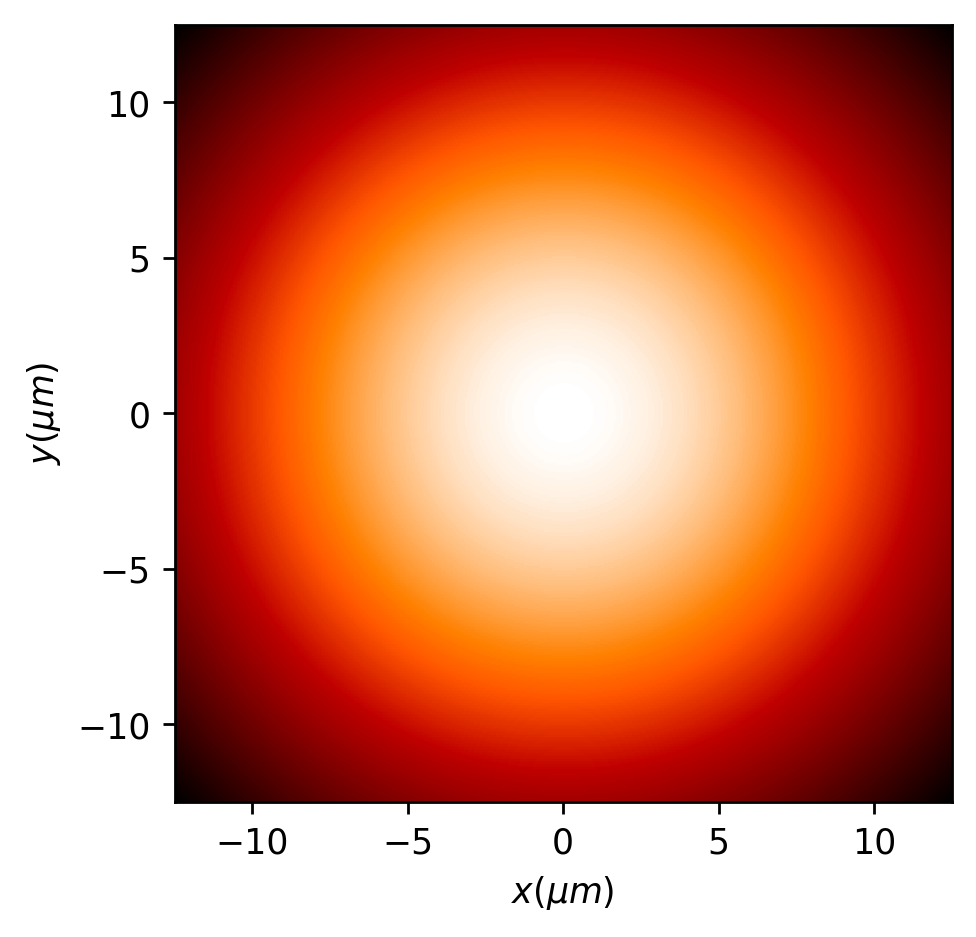

In [11]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0),
              w0=(32 * um, 32 * um),
              z0=0 * um,
              A=1,
              theta=0. * degrees,
              phi=0 * degrees)

u0.draw()

t1 = Scalar_mask_XY(x0, y0, wavelength)

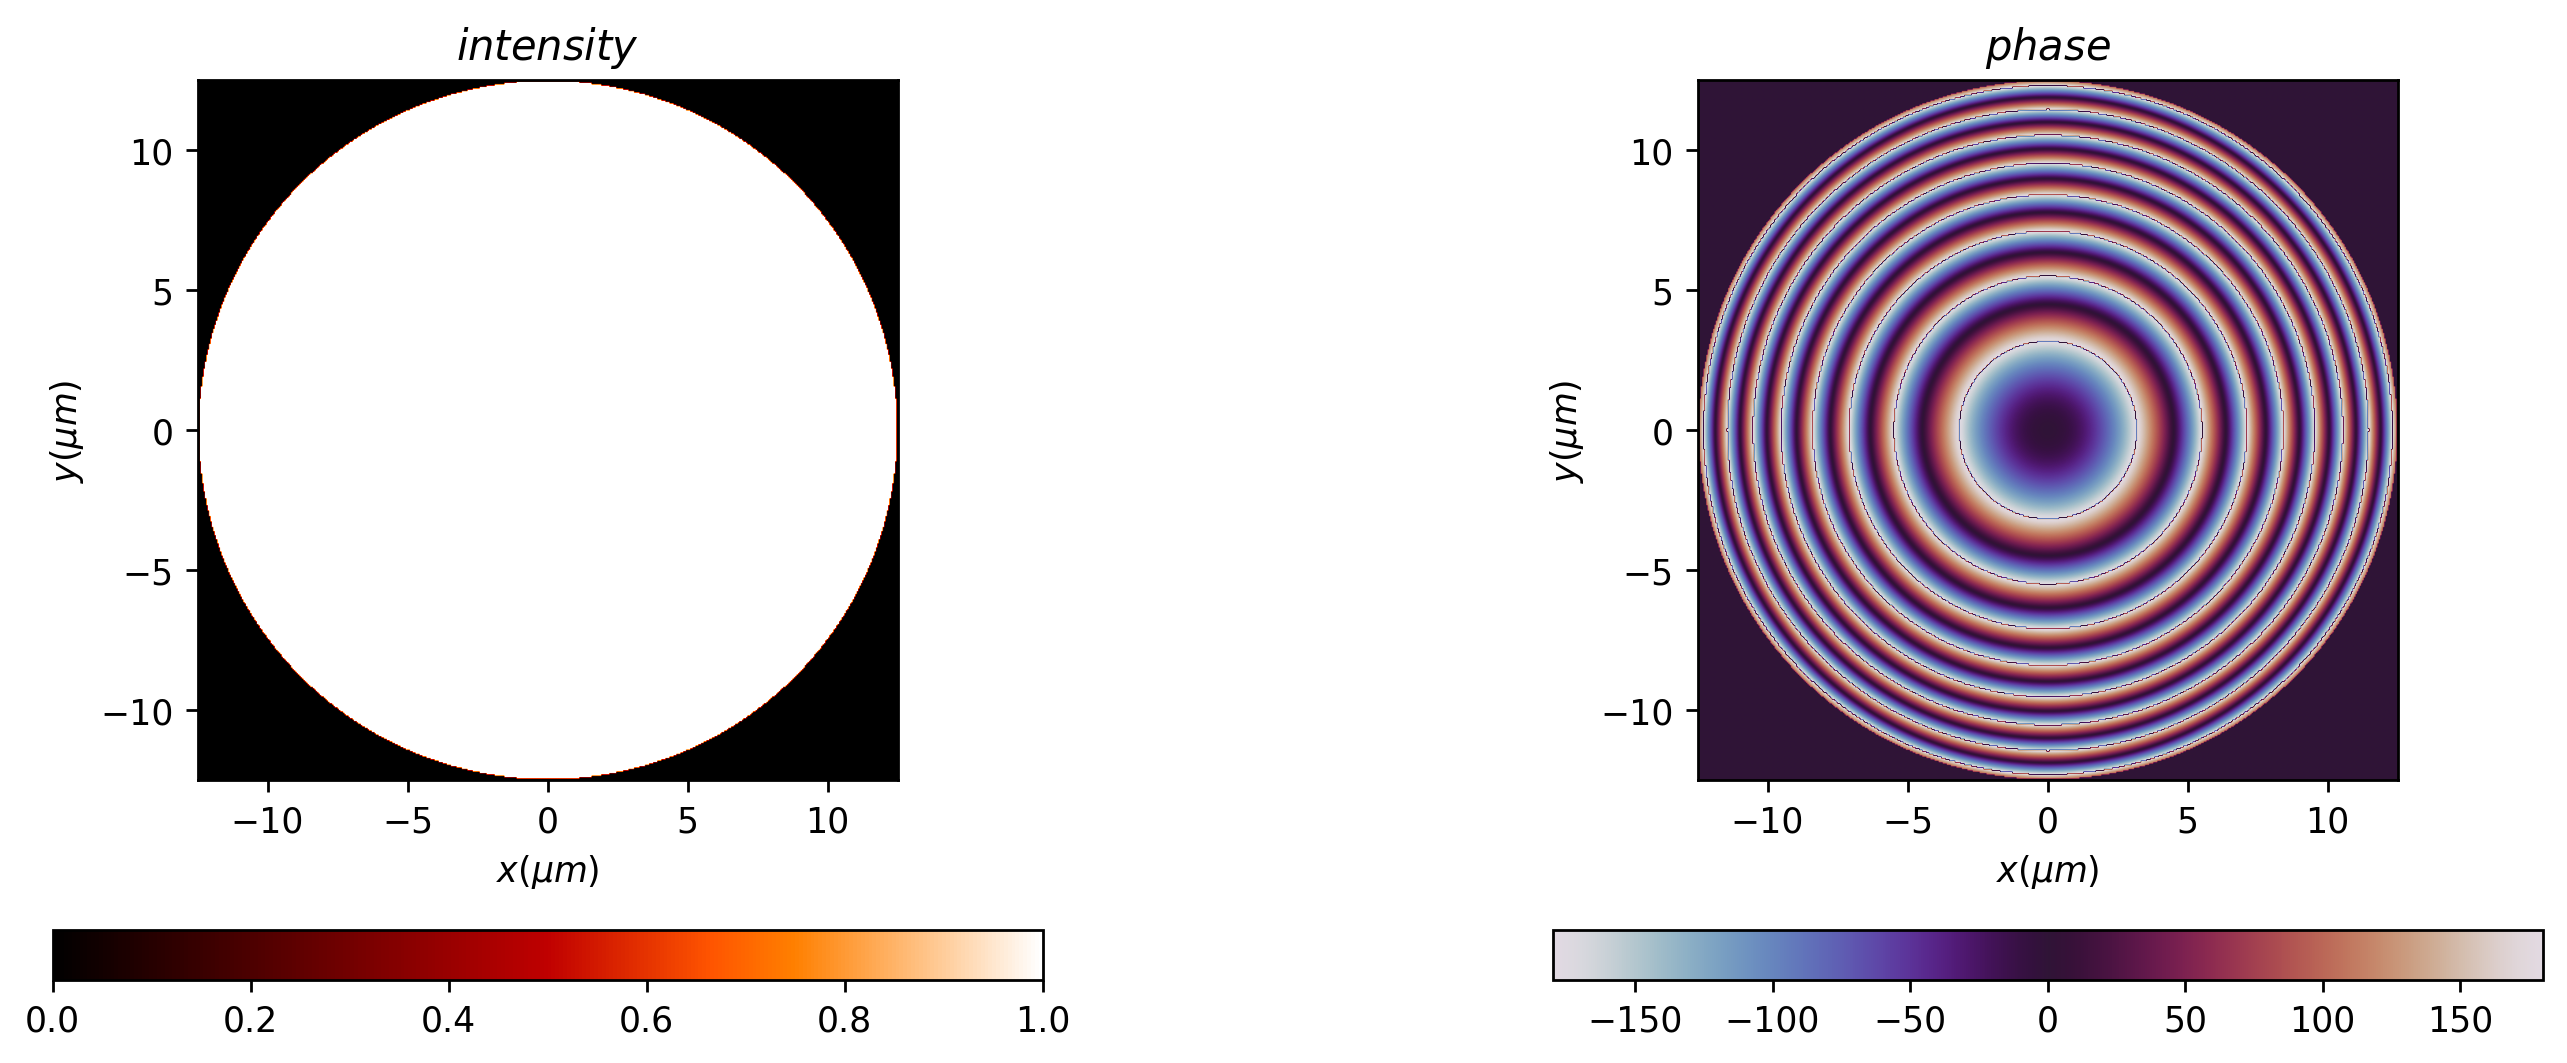

In [12]:
t = Scalar_mask_XY(x0, y0, wavelength)
t.lens(r0=(0, 0), focal=focal, radius=size / 2)
t.draw('field');


In [13]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_polarization(u=u1, v=(1, 0))
#EM1.azimuthal_wave(u=u1, r0=(0, 0), radius=(20, 20))
#EM1.radial_wave(u=u1, r0=(0, 0), radius=(20, 20))


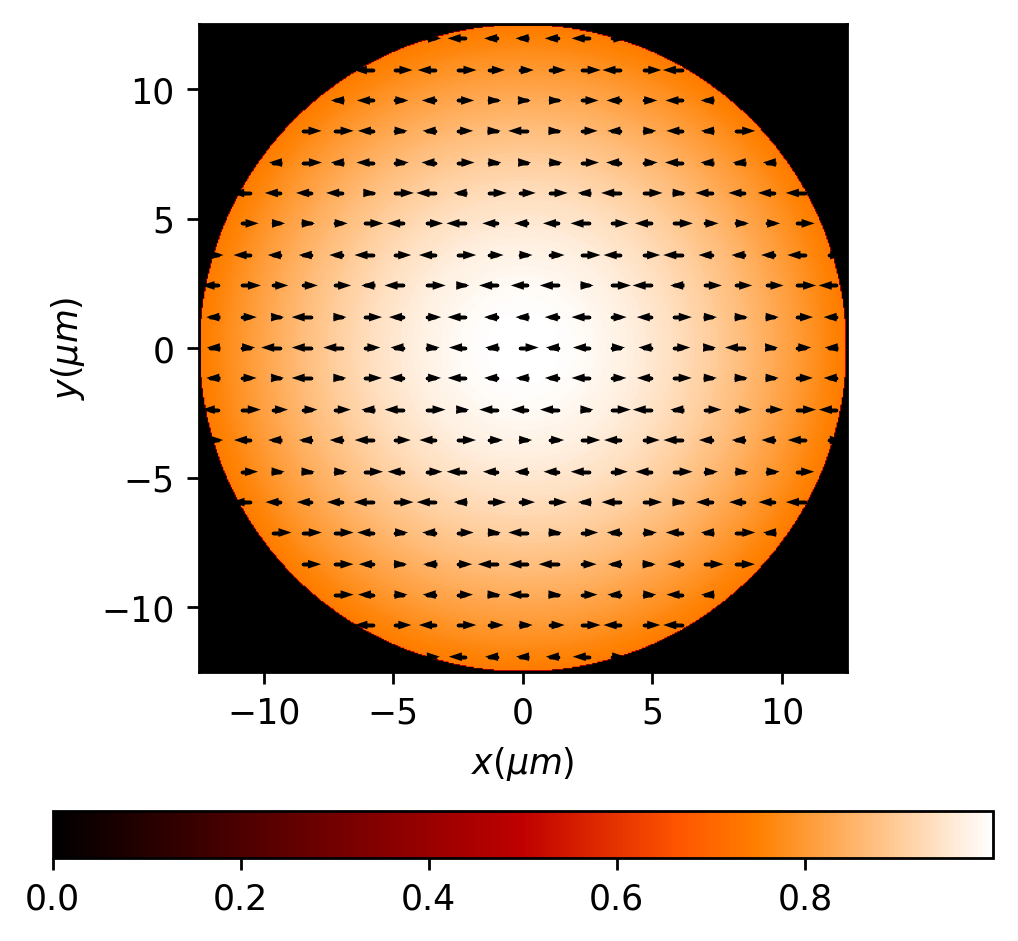

In [19]:
EM1.draw(kind='ellipses', amplification=0.25, line_width=1, head_width=.15, num_ellipses=(21,21), color_line='k')


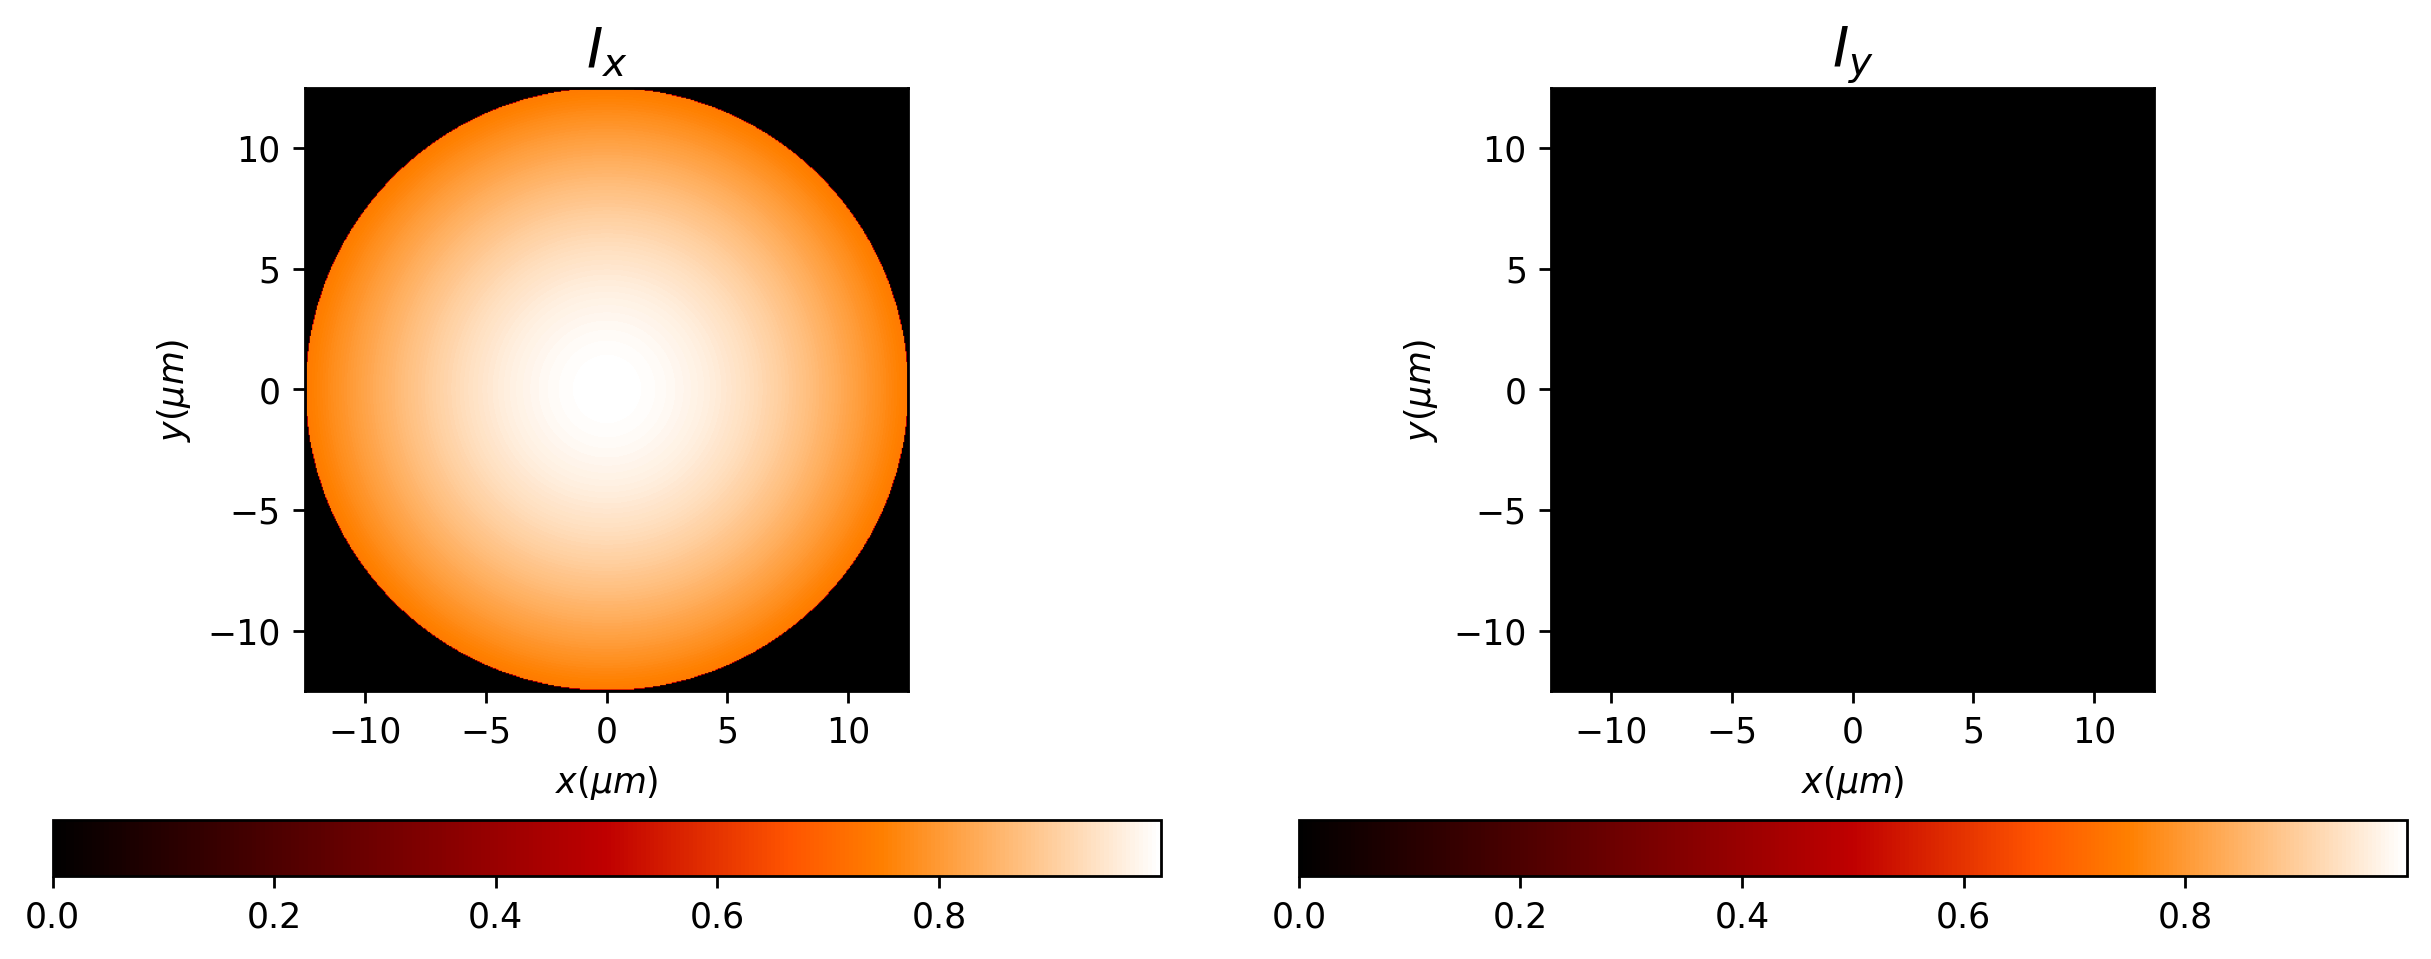

In [20]:
EM1.draw('intensities', logarithm=0);


## to value

In [21]:
x_out = 0.
y_out = 0.
z = focal


In [22]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
print(EM2_1D)


((12.01931943234928-2.910555097903726j), 0j, (-3.3306690738754696e-16-5.551115123125783e-16j))
CPU times: user 133 ms, sys: 7.84 ms, total: 140 ms
Wall time: 139 ms


## to x_field


In [23]:
size_out = 16 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = 0.
z = focal


CPU times: user 162 ms, sys: 32.5 ms, total: 194 ms
Wall time: 193 ms


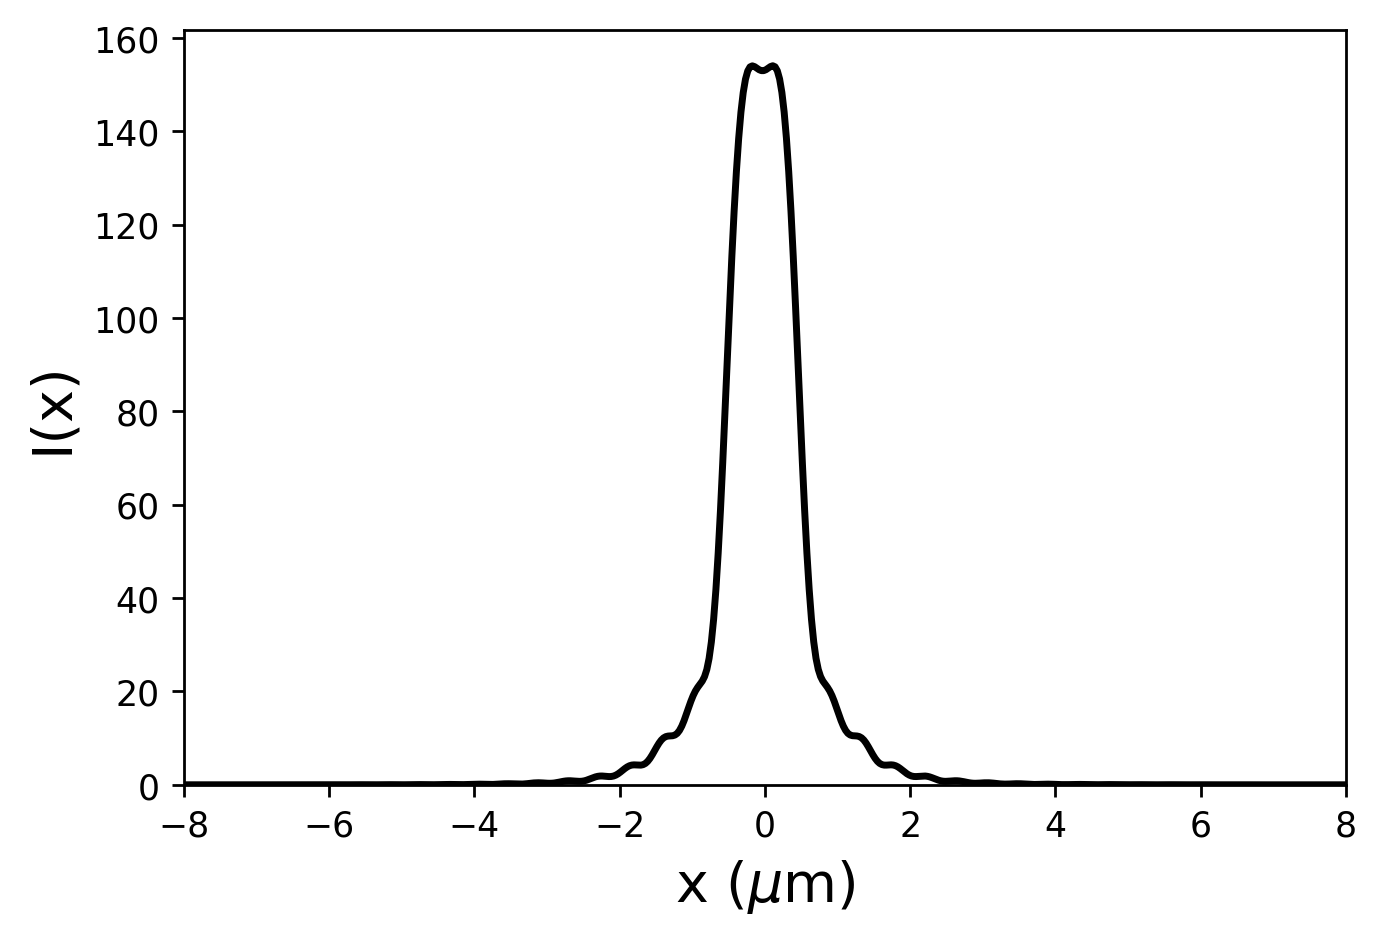

In [24]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
EM2_1D.draw('intensity');

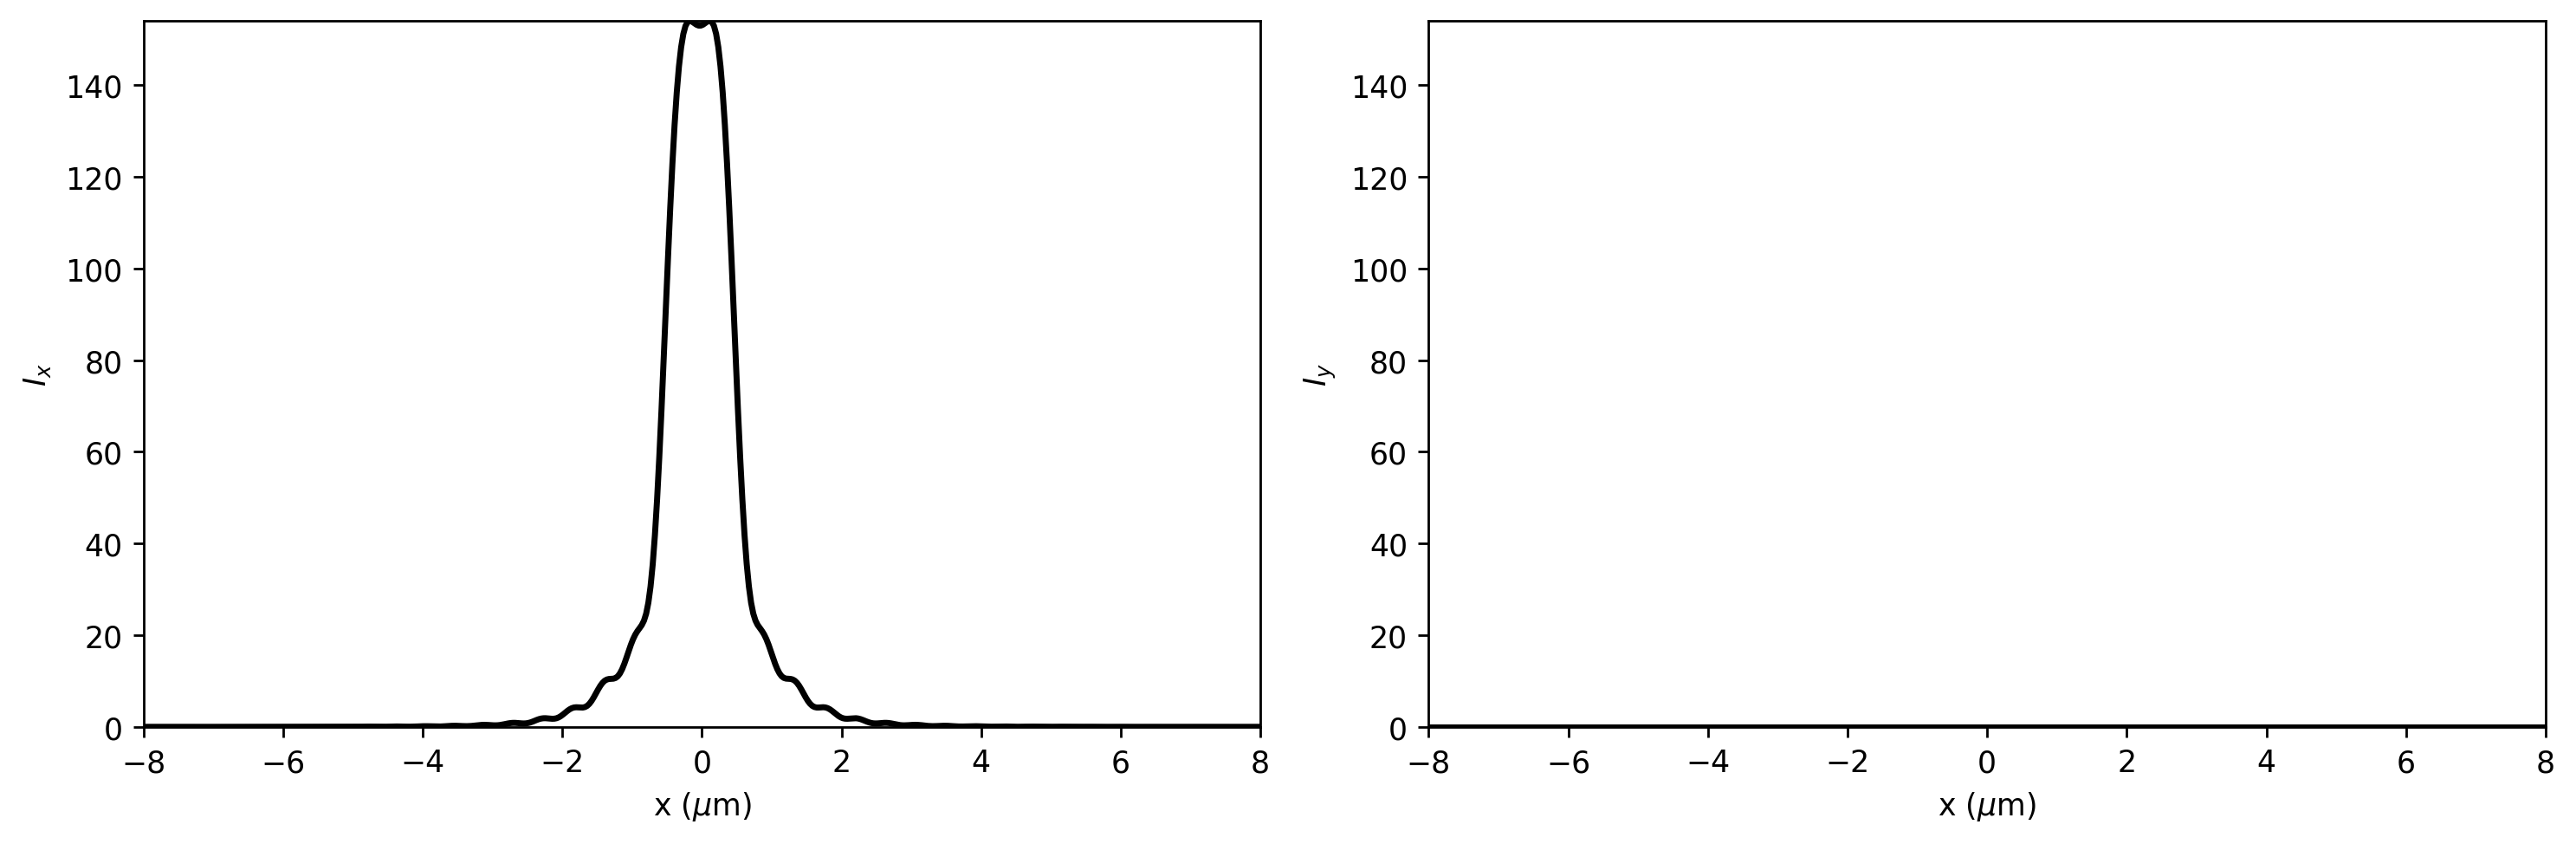

In [25]:
EM2_1D.draw('intensities');


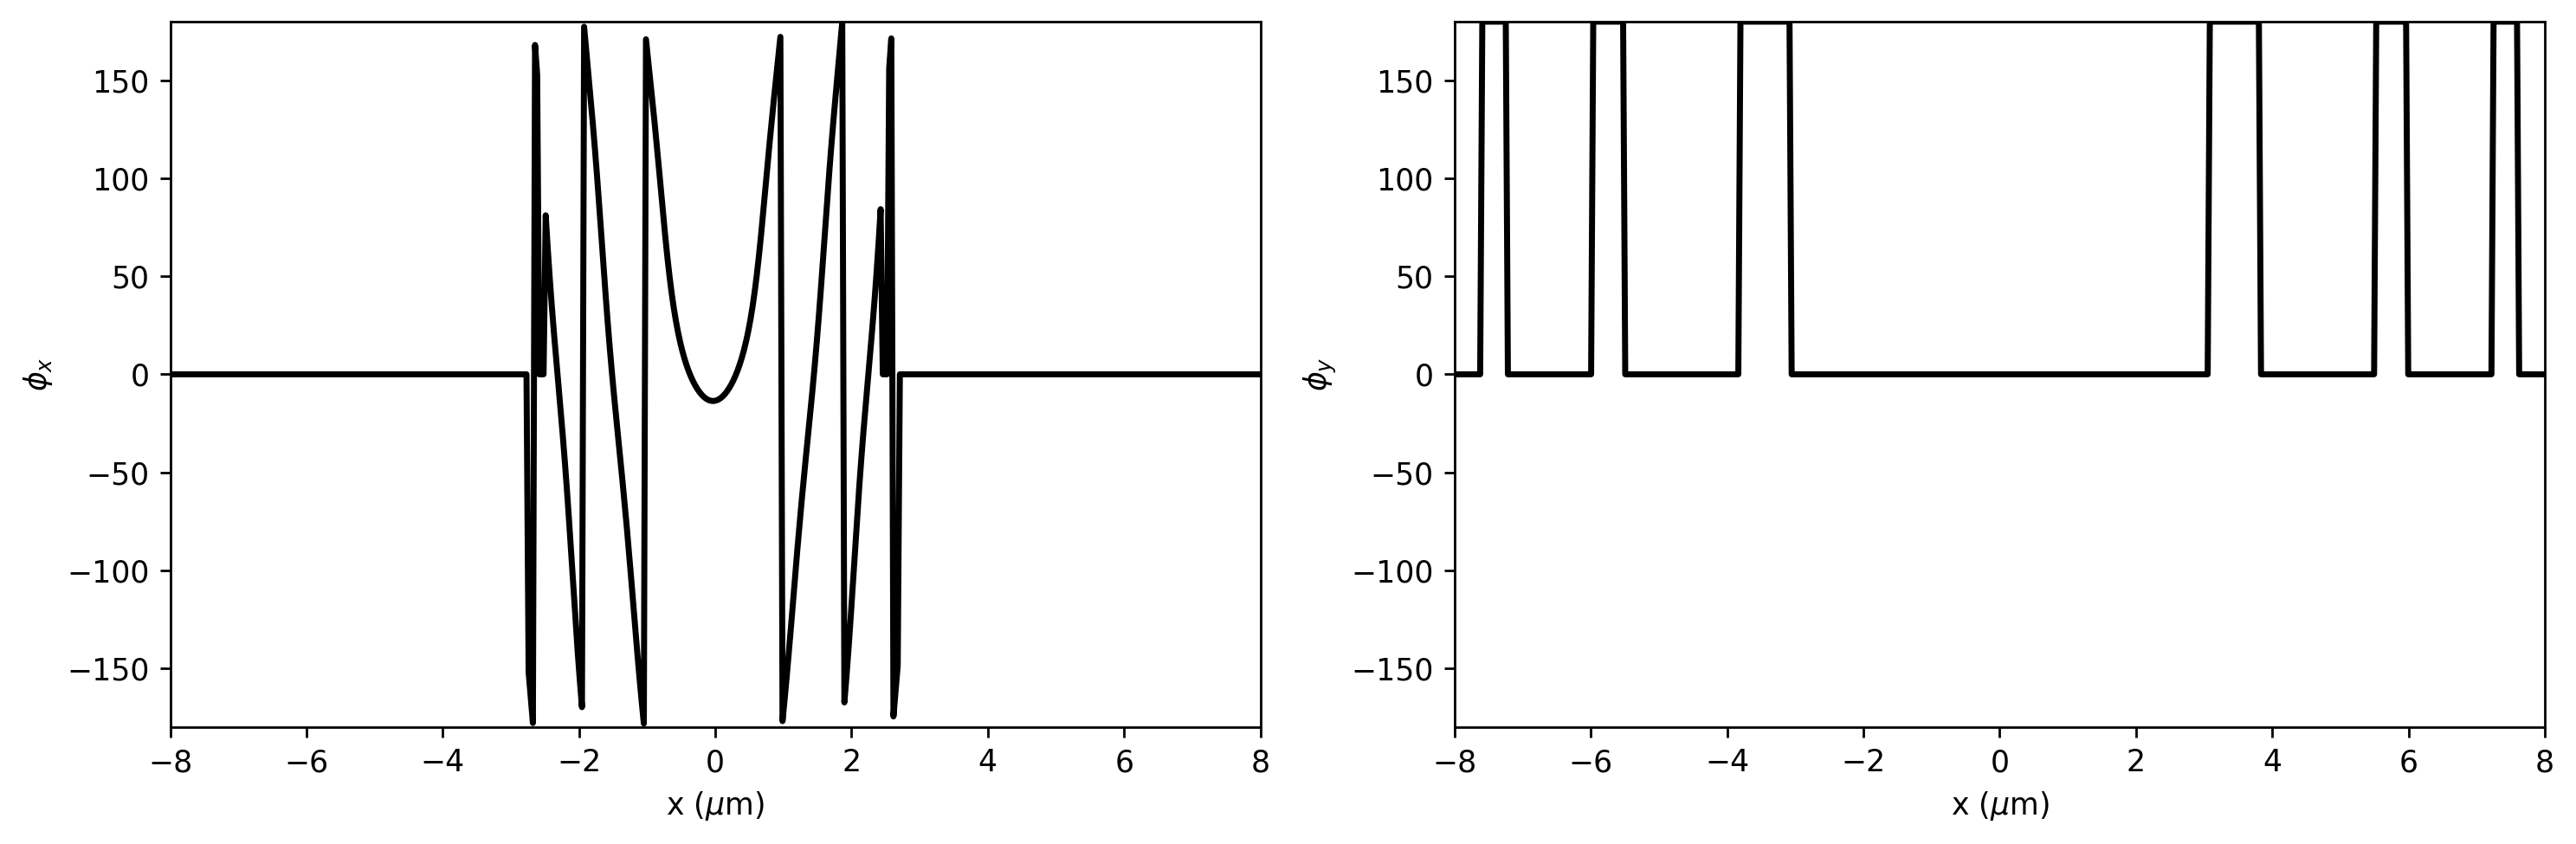

In [26]:
EM2_1D.draw('phases');

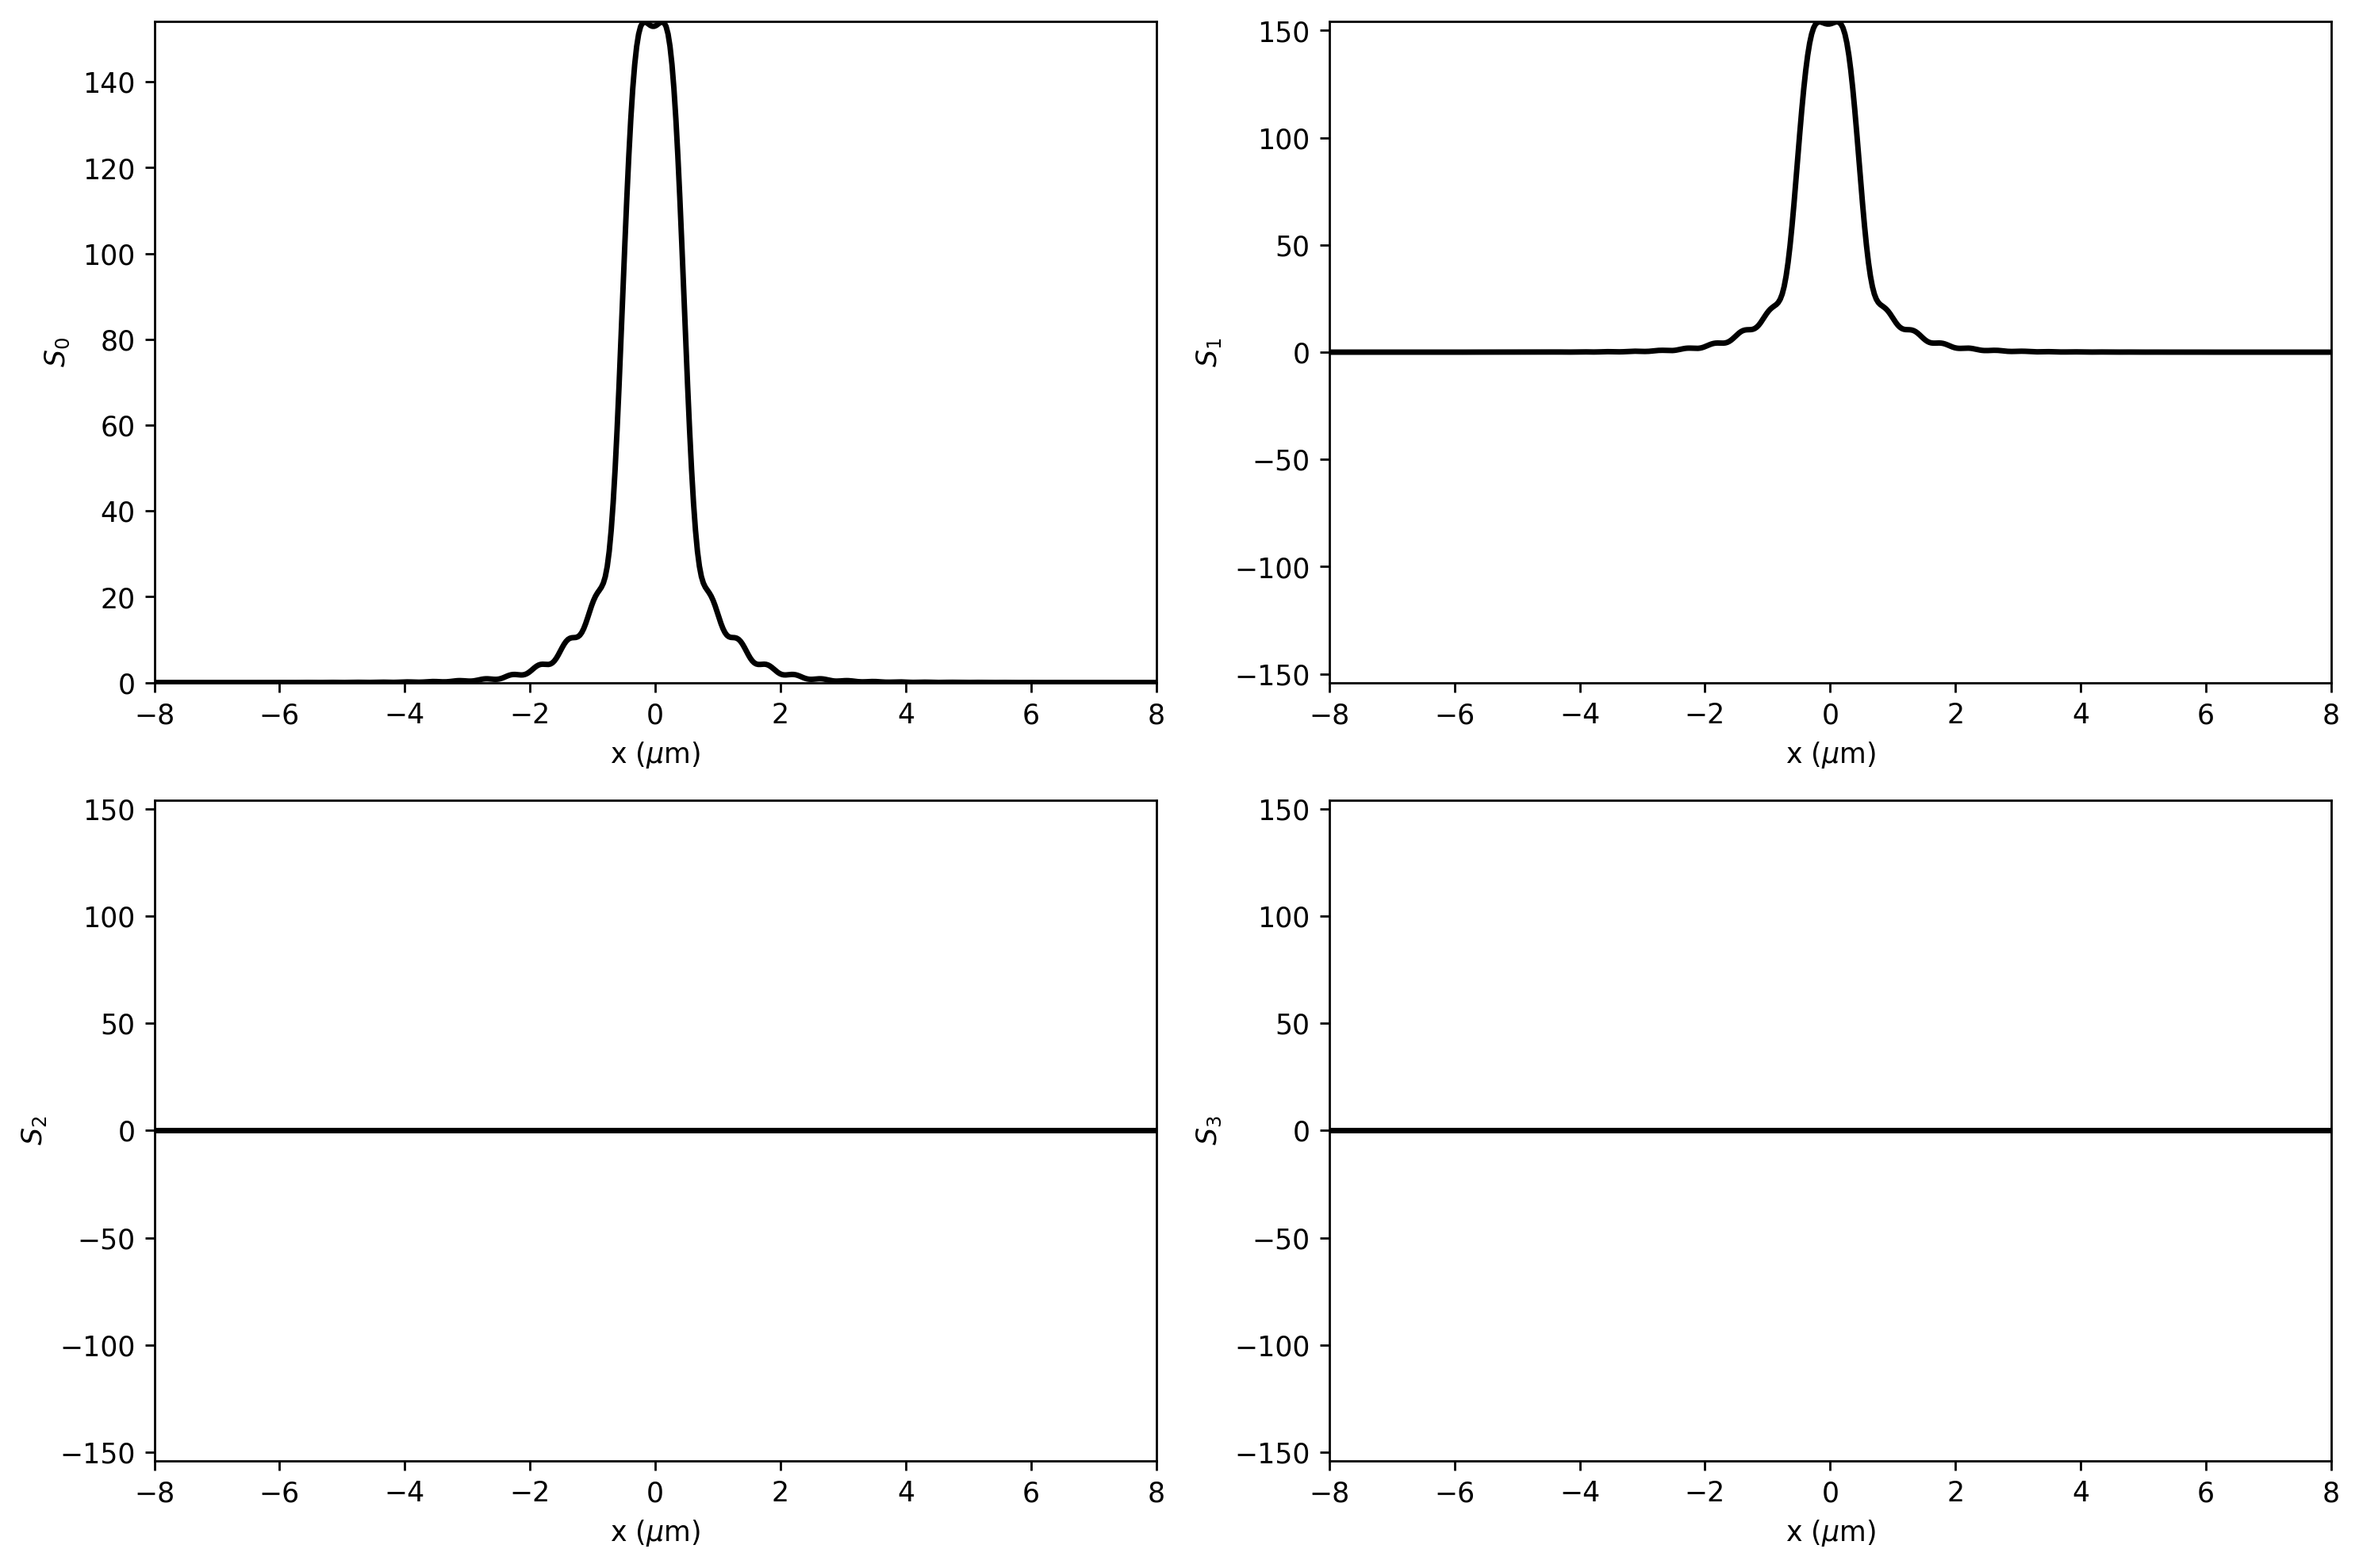

In [27]:
EM2_1D.draw('stokes');

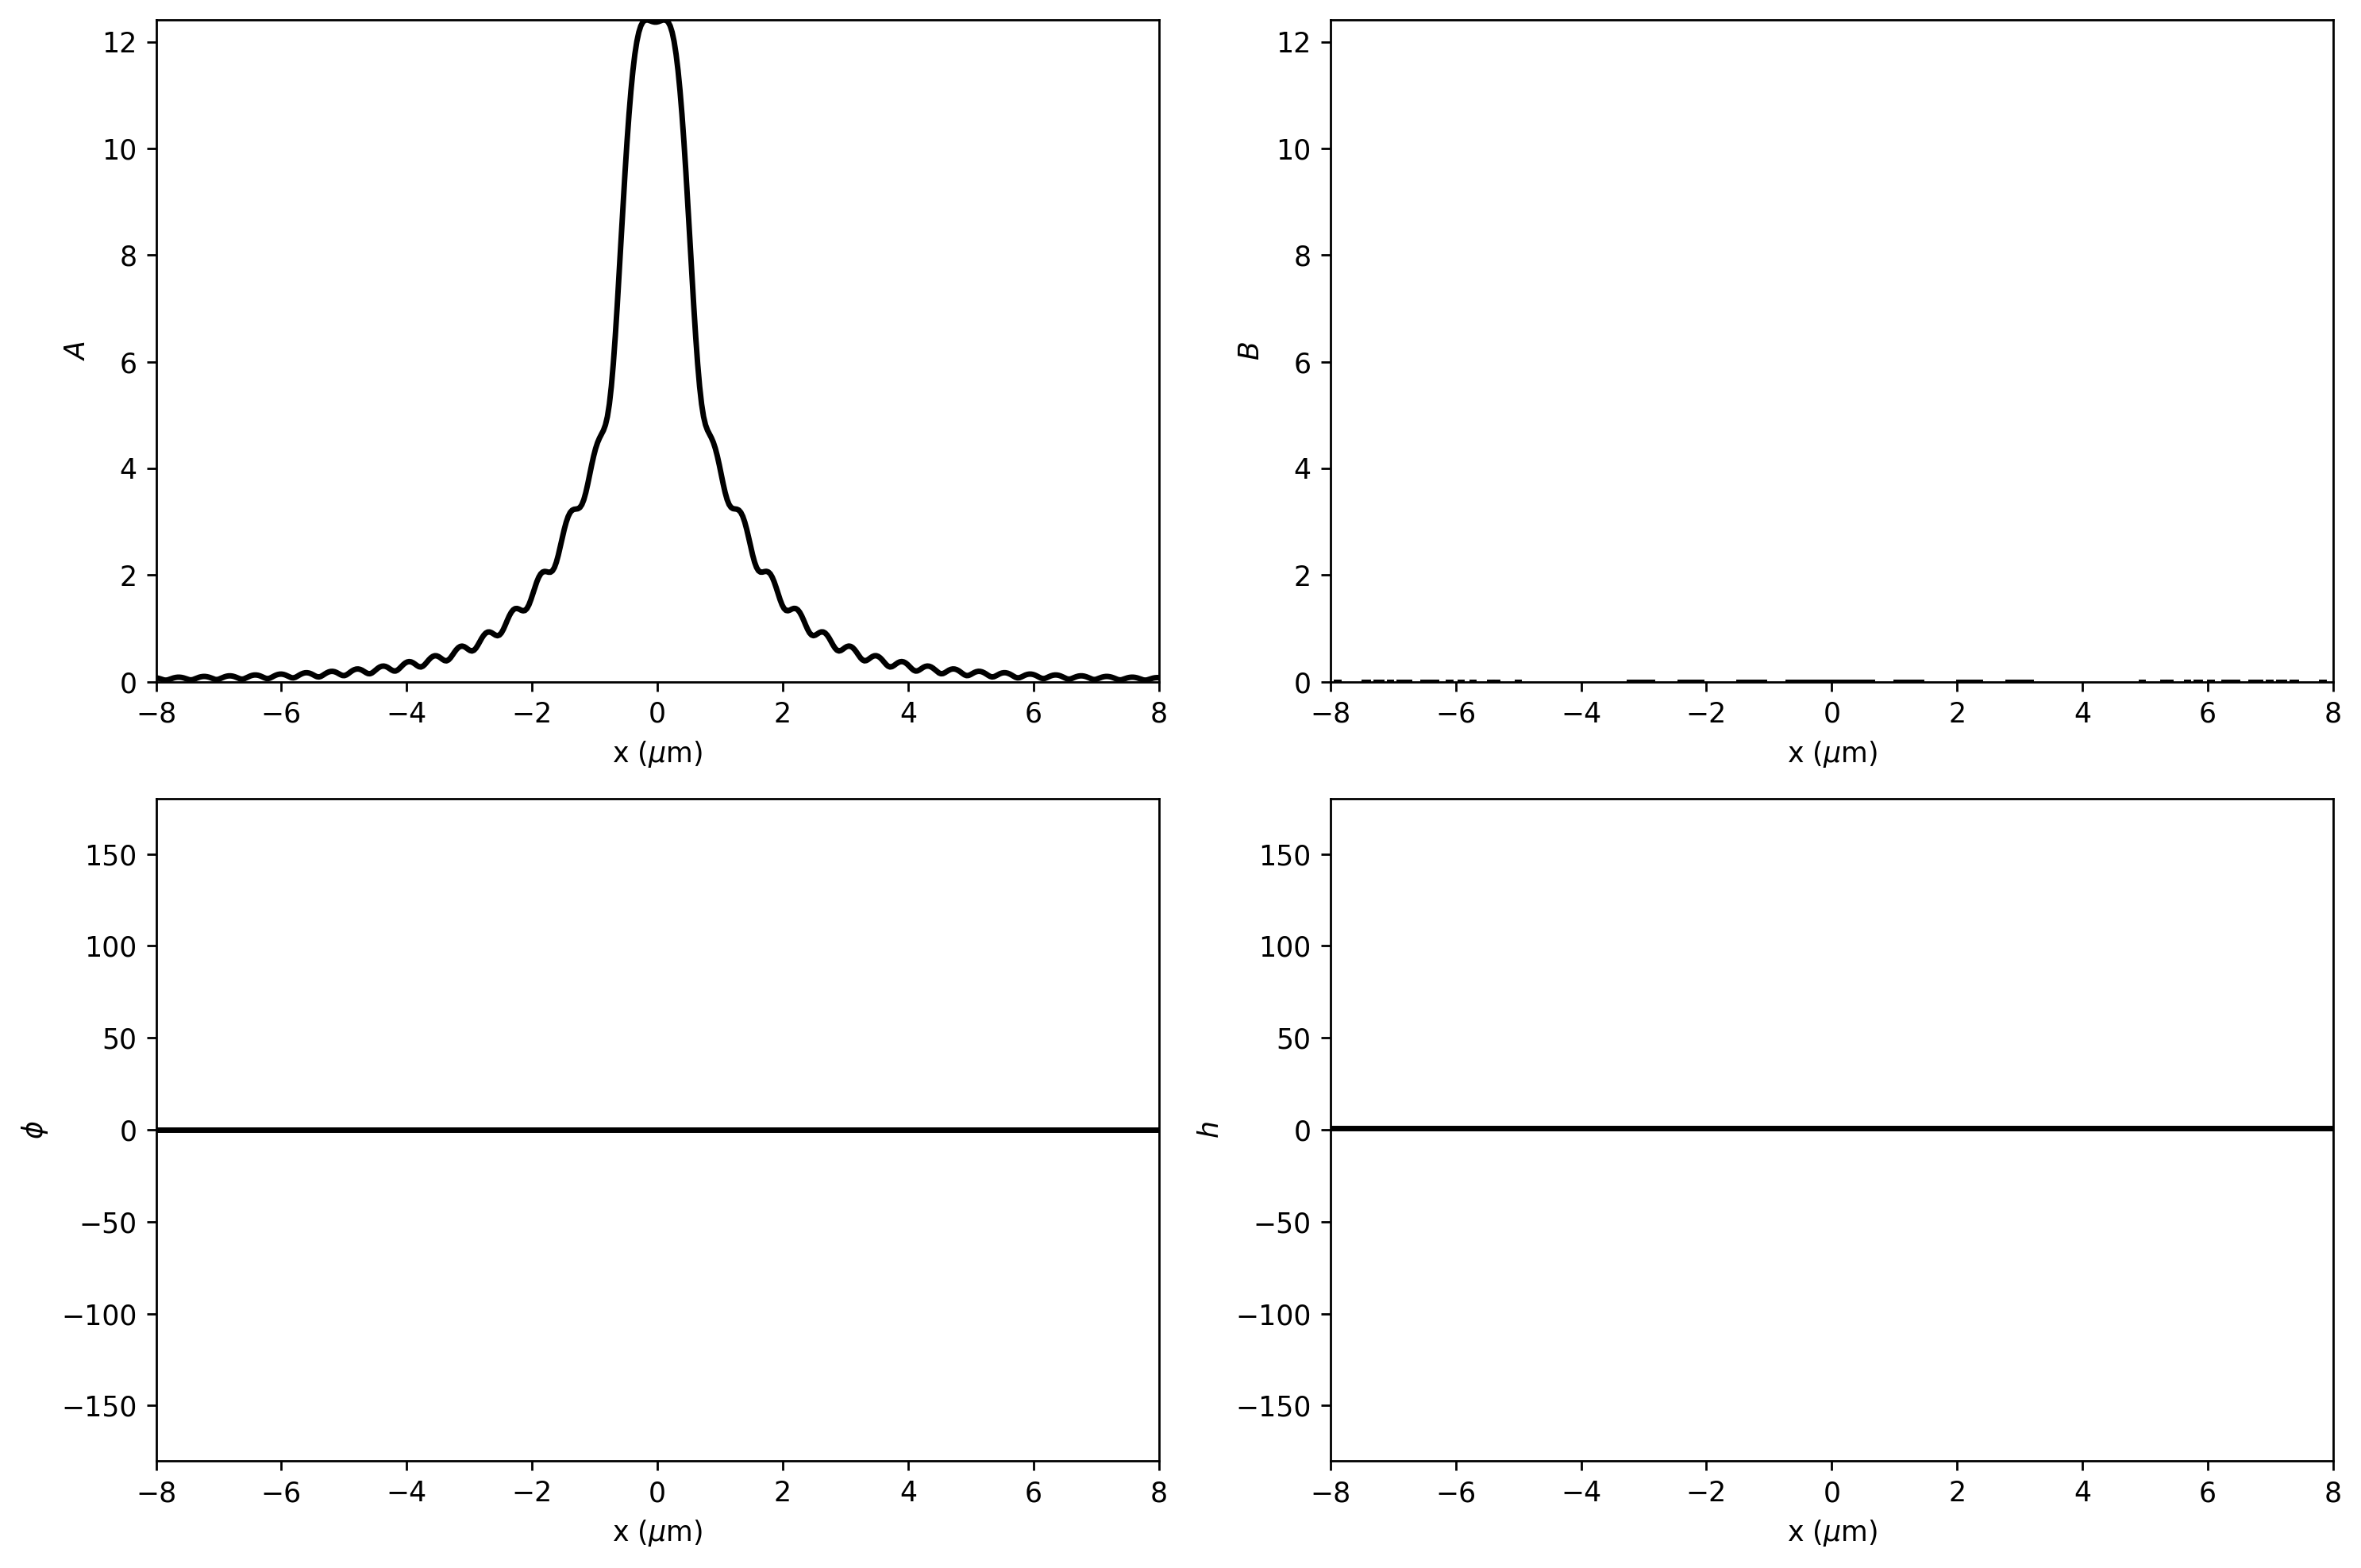

In [28]:
EM2_1D.draw('param_ellipses');


## to z_field


In [29]:
x_out = 0.
y_out = 0.
z = np.linspace(focal - 4 * um - 6 * um, focal - 2 * um + 6 * um, 64)


In [30]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=True);


CPU times: user 7.21 s, sys: 1.59 ms, total: 7.21 s
Wall time: 7.19 s


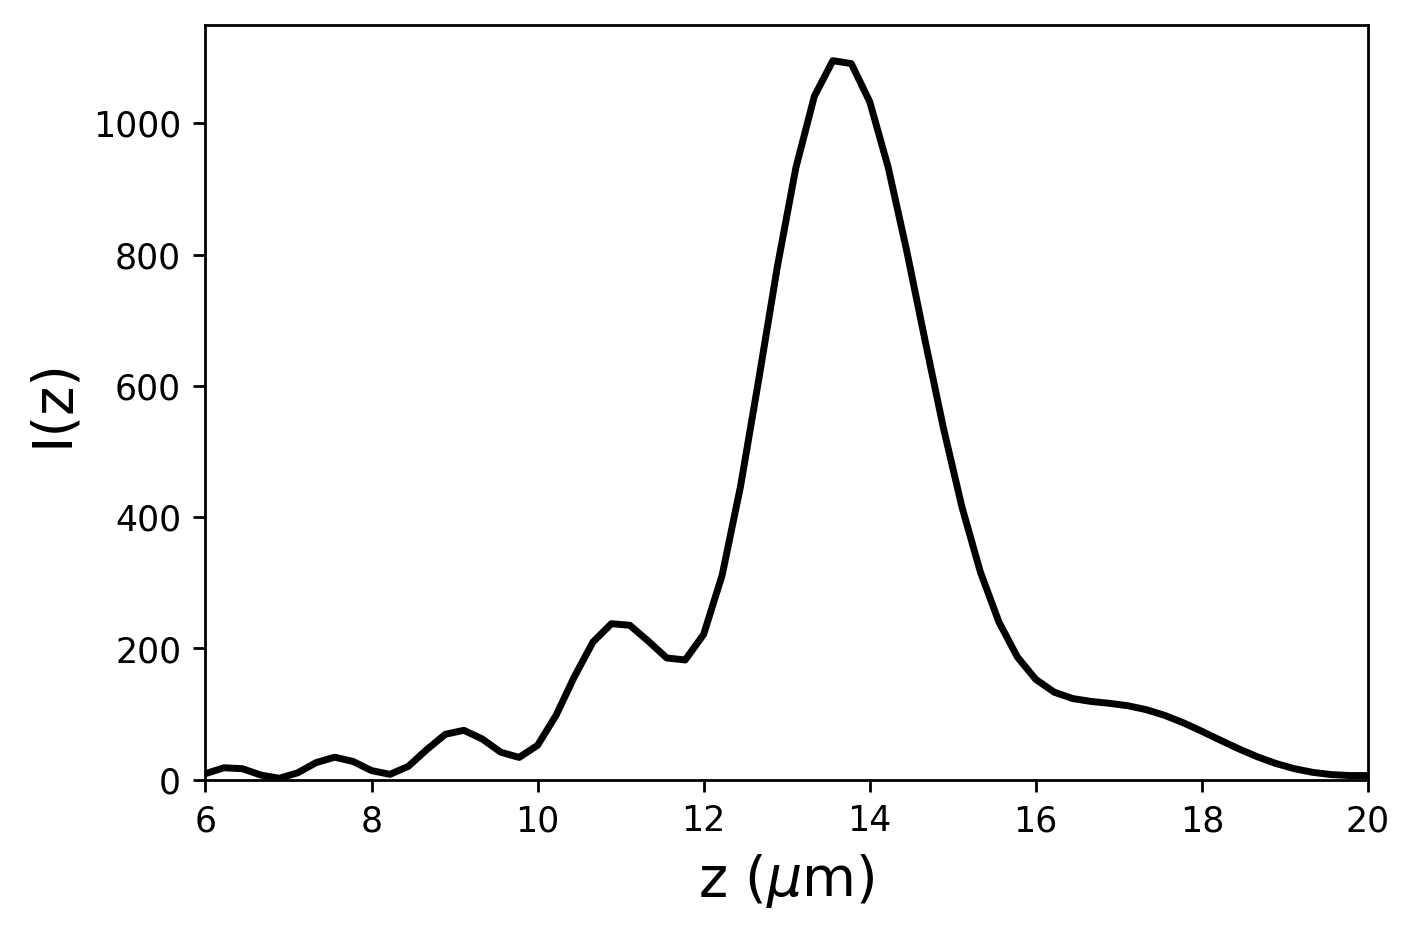

In [31]:
EM2.draw('intensity')


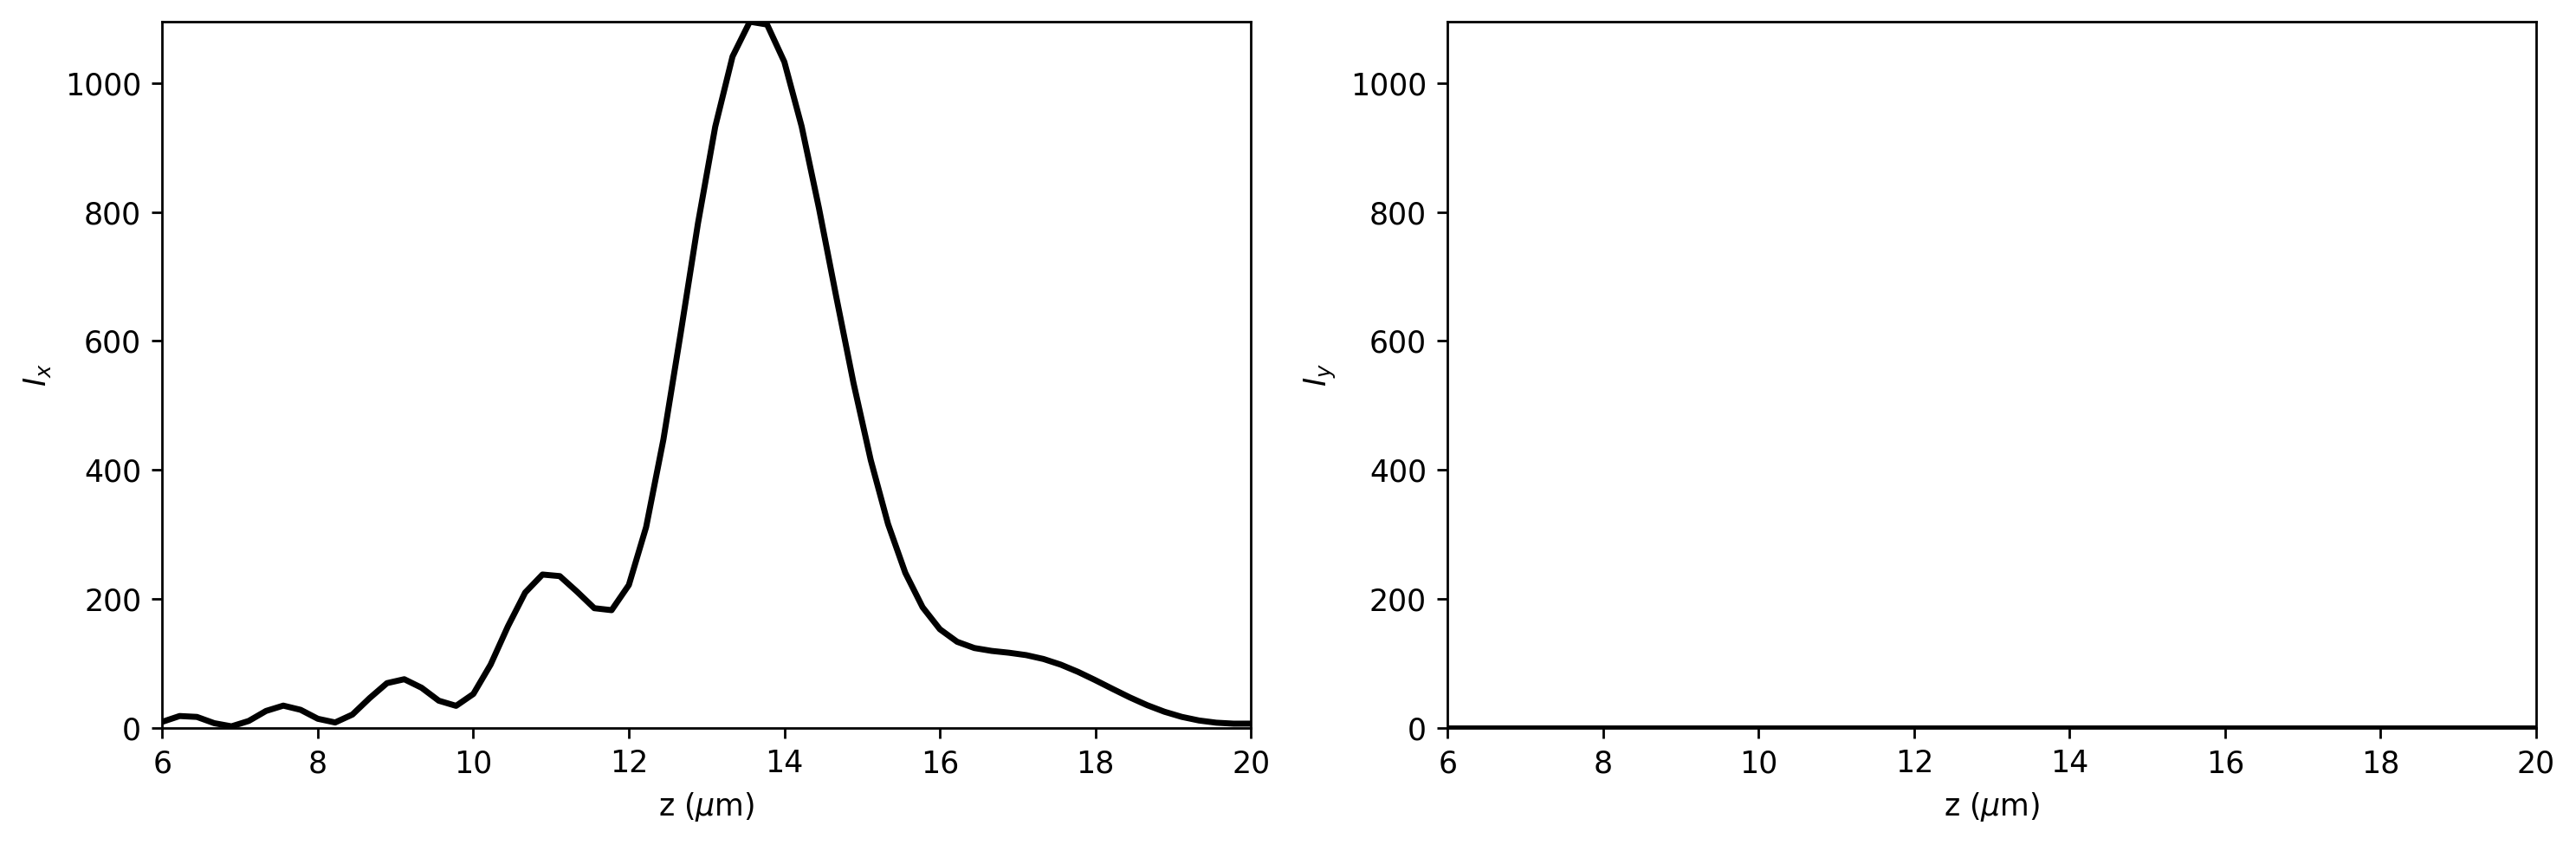

In [32]:
EM2.draw('intensities');


## to XZ_field


In [33]:
size_out = 5 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 256)
y_out = 0.
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 128)


In [34]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=True)


CPU times: user 15.9 s, sys: 14.8 ms, total: 15.9 s
Wall time: 15.9 s


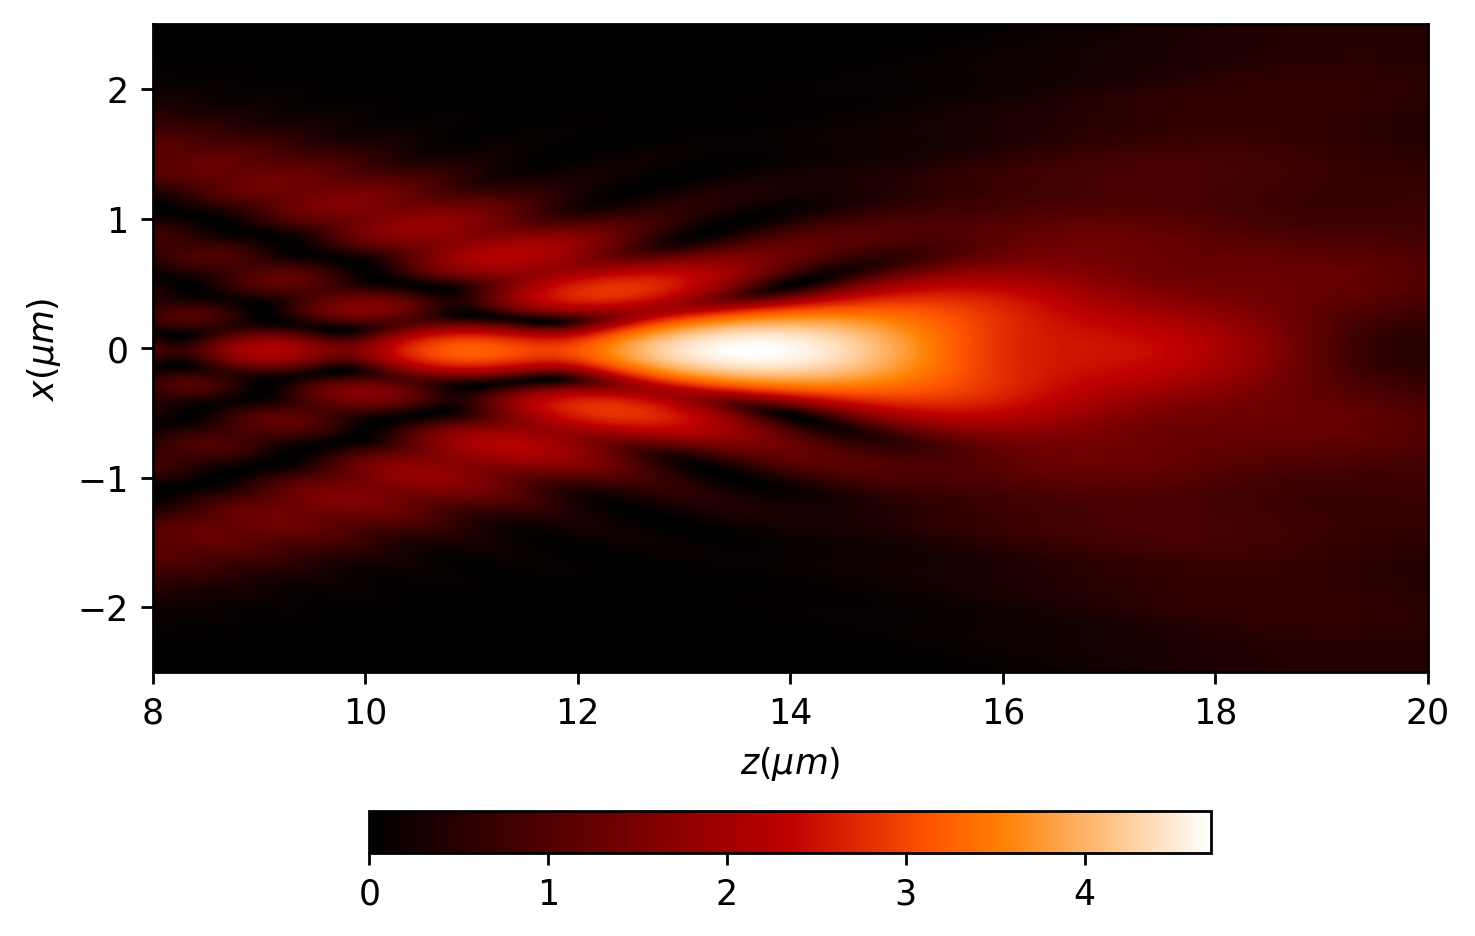

In [35]:
EM2.draw('intensity', logarithm=1e-1);

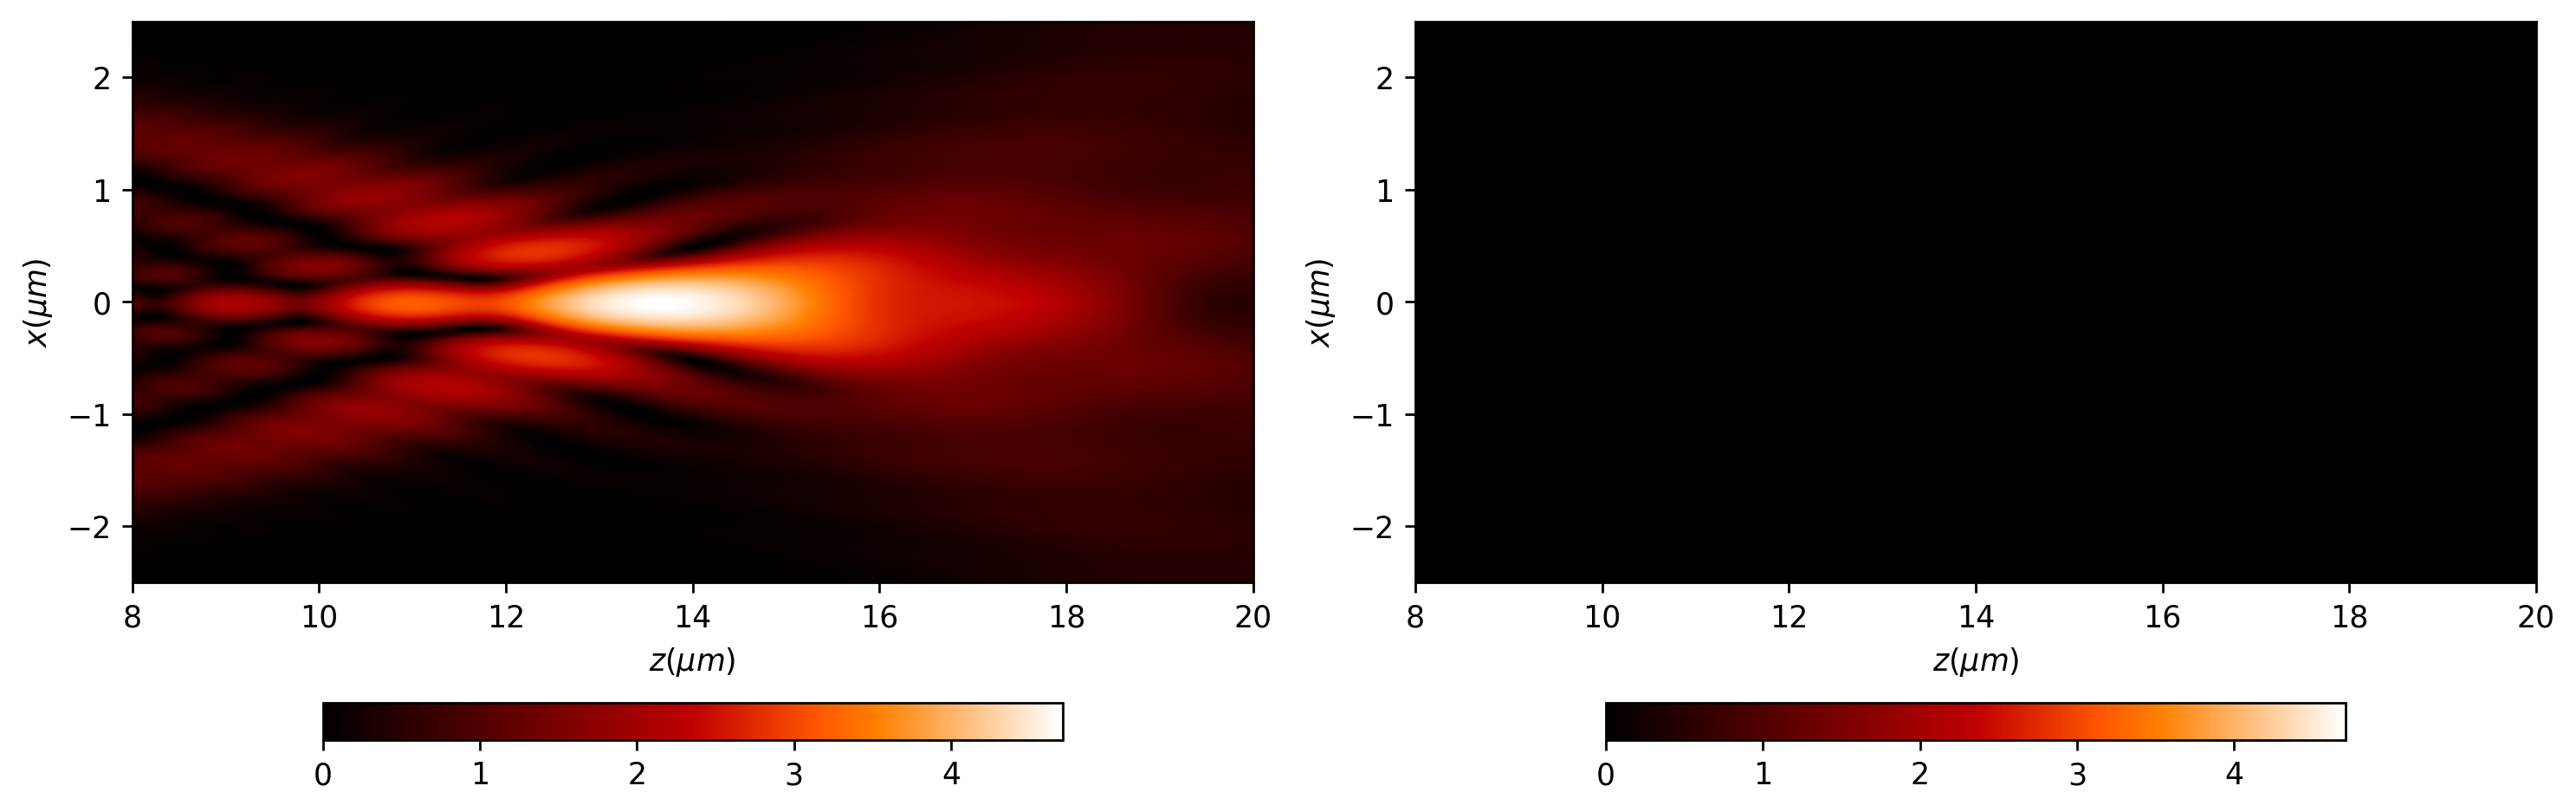

In [36]:
EM2.draw('intensities', logarithm=1e-1);

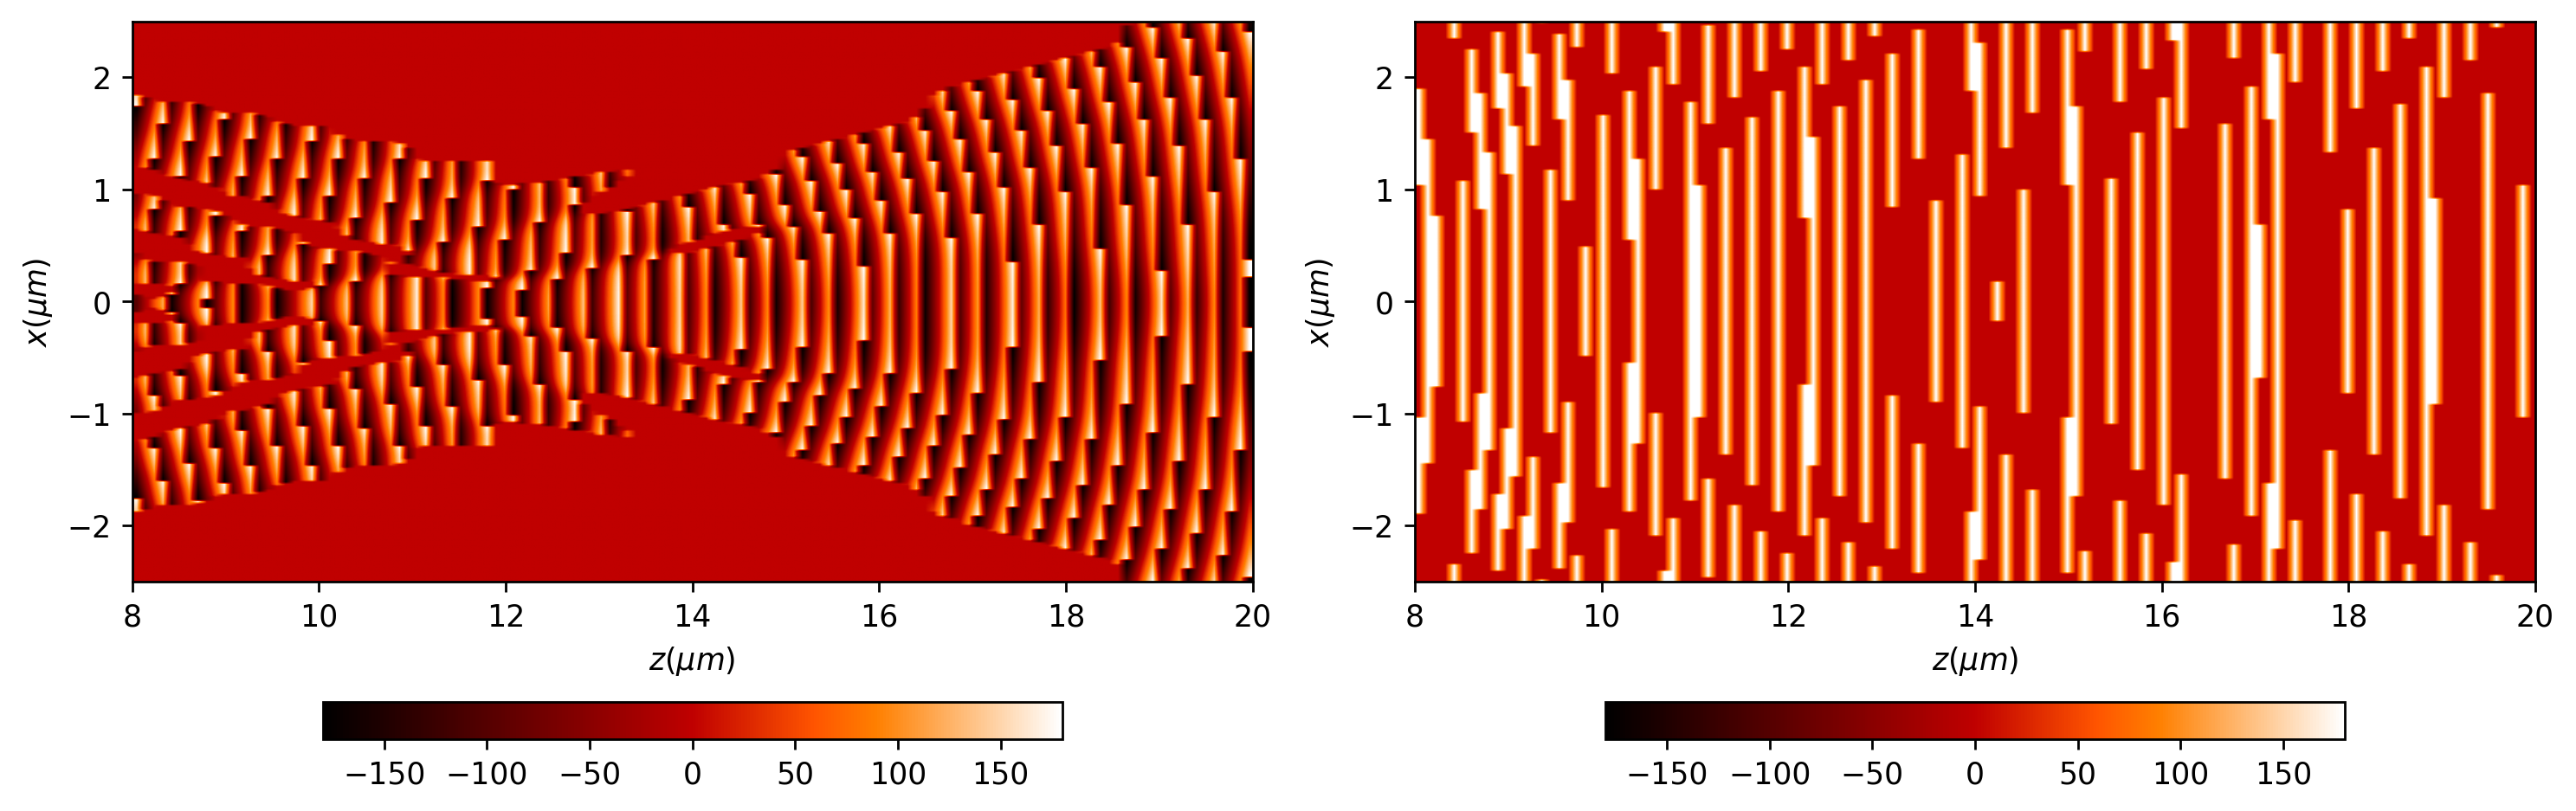

In [37]:
EM2.draw('phases');


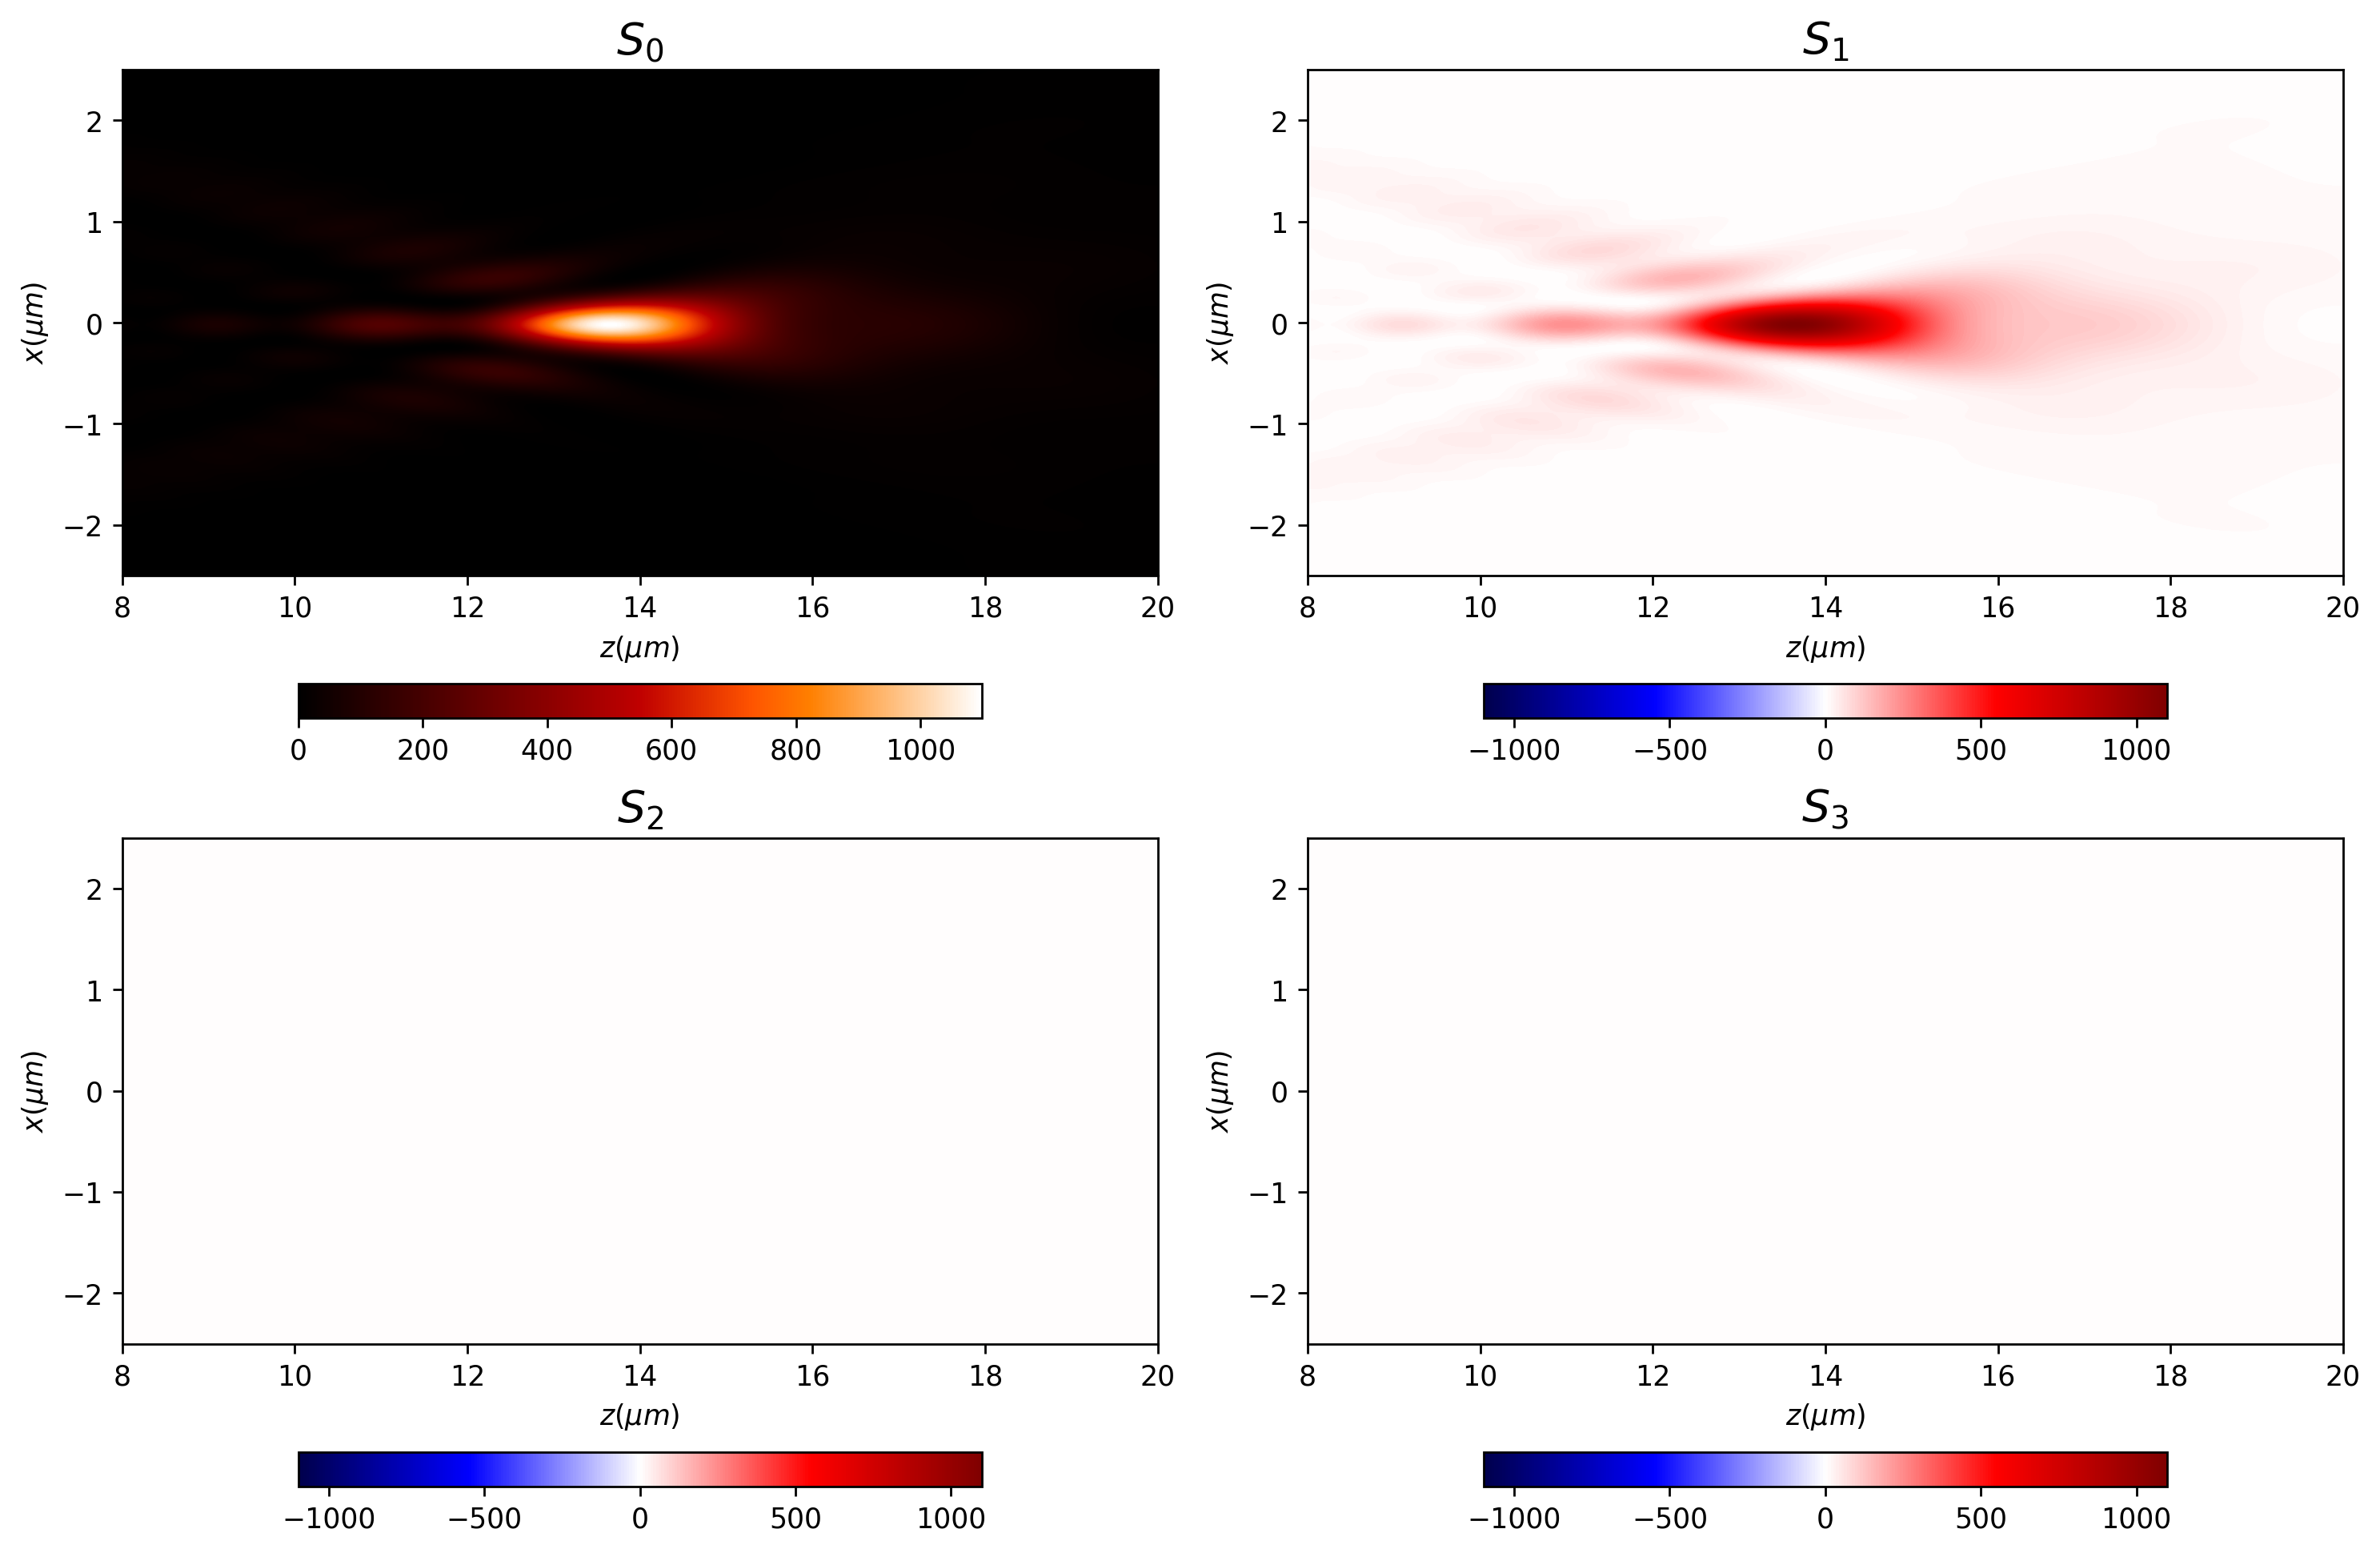

In [38]:
EM2.draw('stokes', logarithm=0);

## to XY_field


In [39]:
size_out = 3 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 256)
y_out = np.linspace(-size_out / 2, size_out / 2, 256)
z = focal-2

In [40]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 169 ms, sys: 7.27 ms, total: 176 ms
Wall time: 174 ms


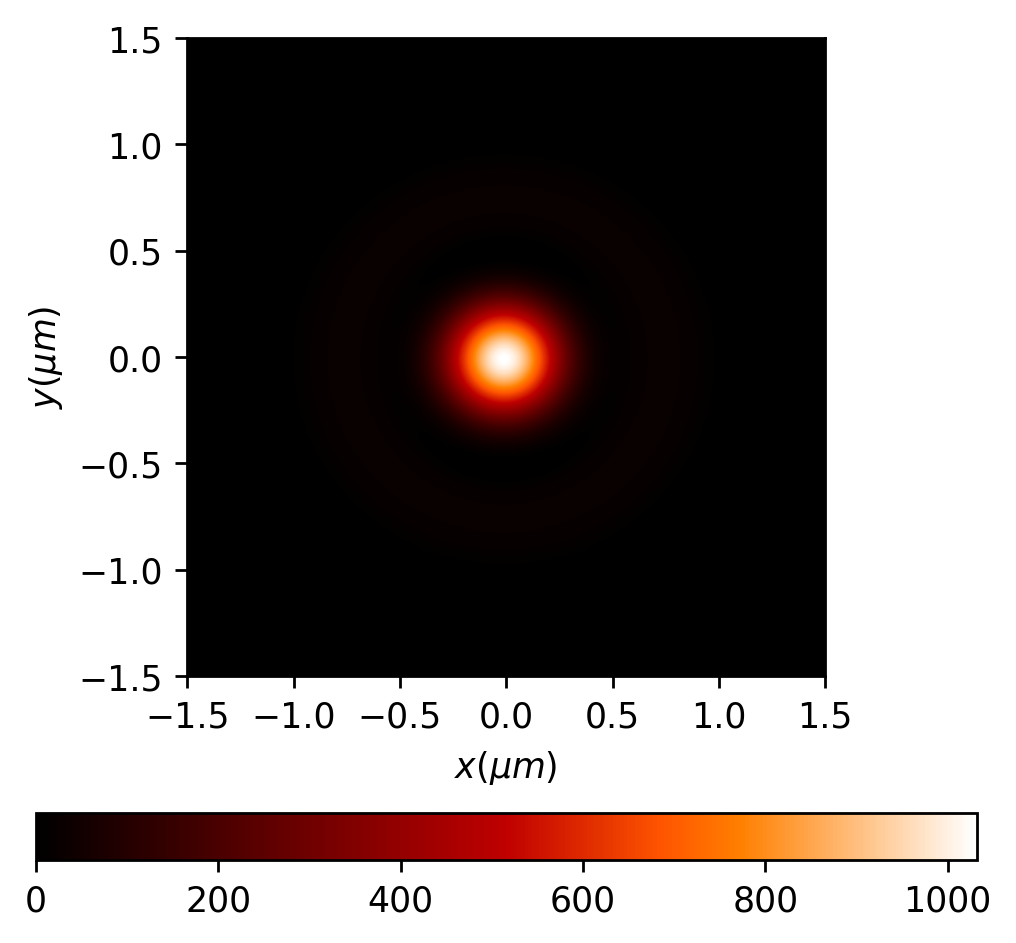

In [41]:
EM2.draw('intensity');


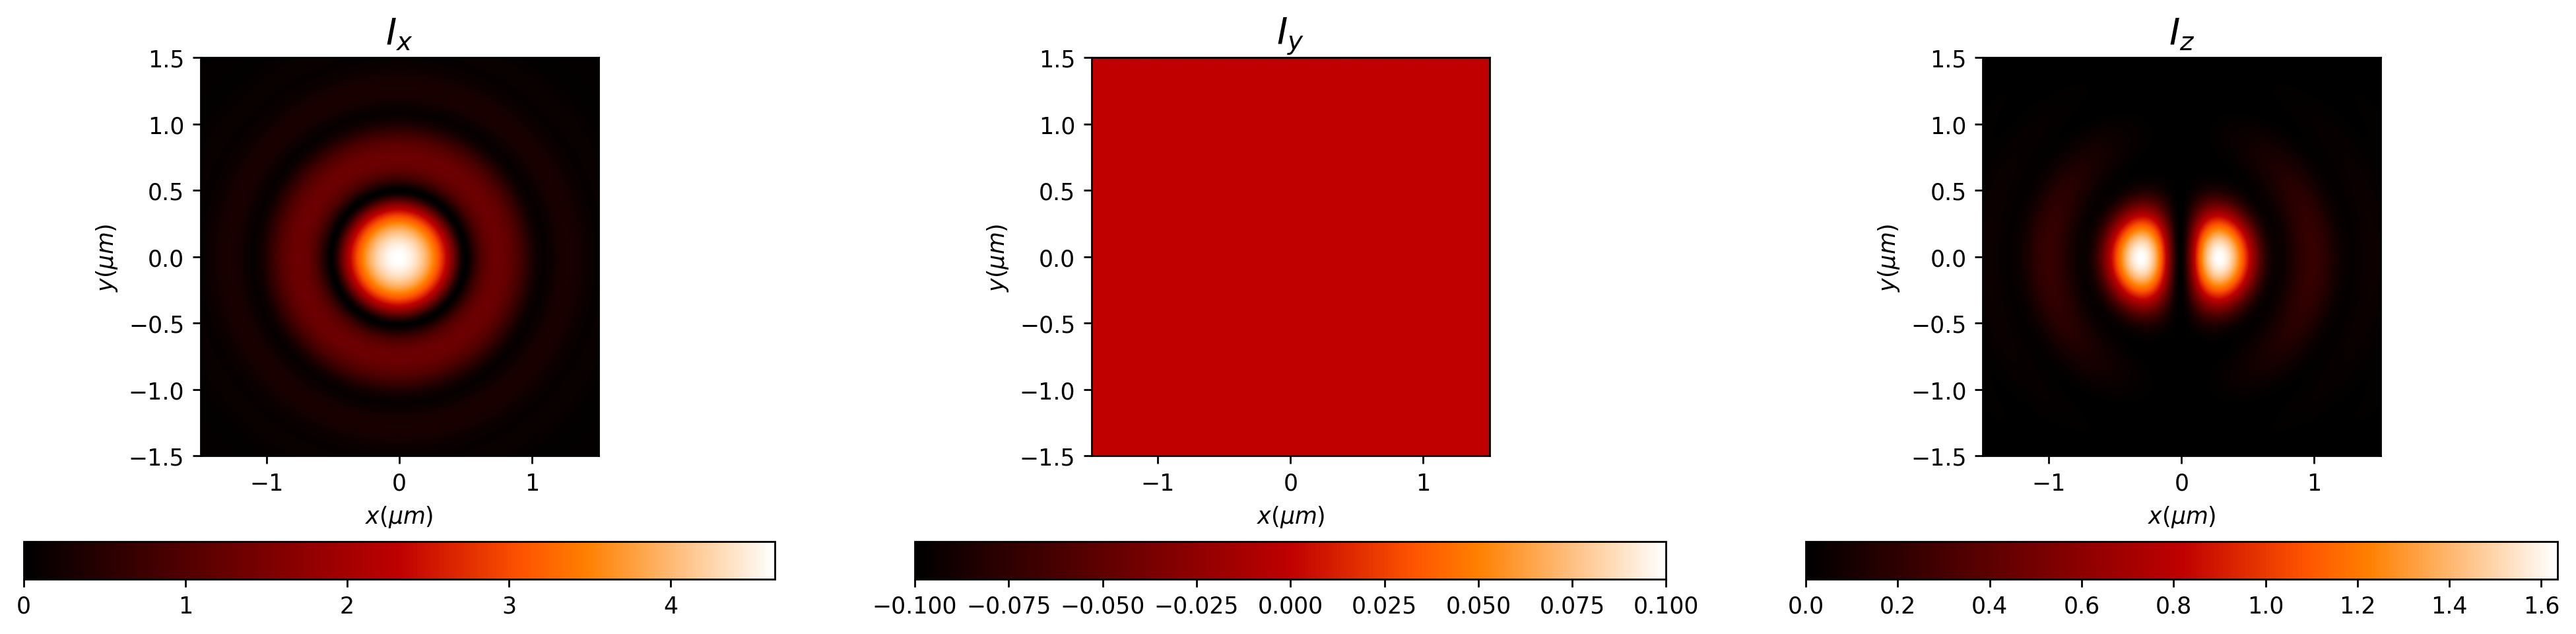

In [42]:
EM2.draw('intensities', logarithm=1e-1);


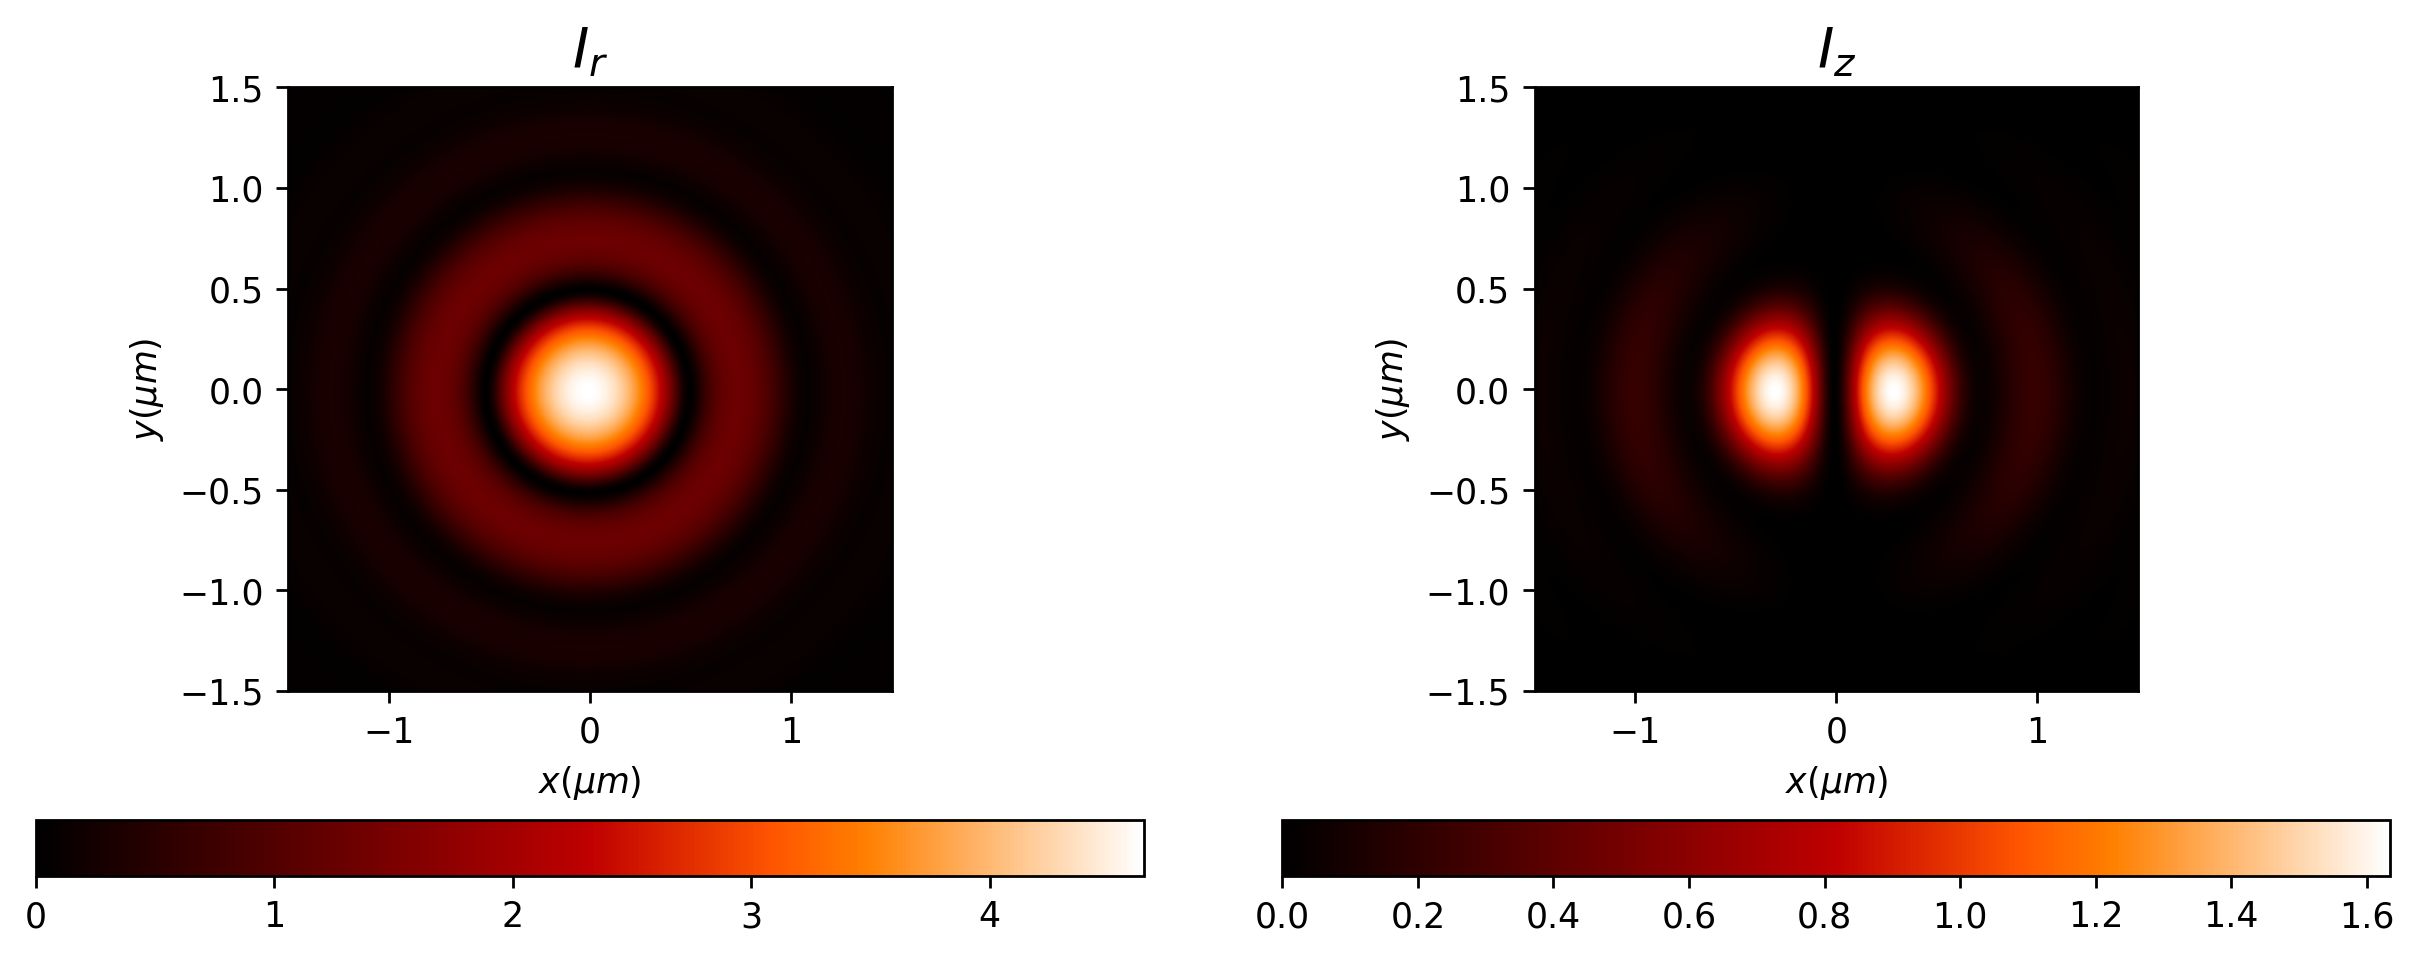

In [43]:
EM2.draw('intensities_rz', logarithm=1e-1)


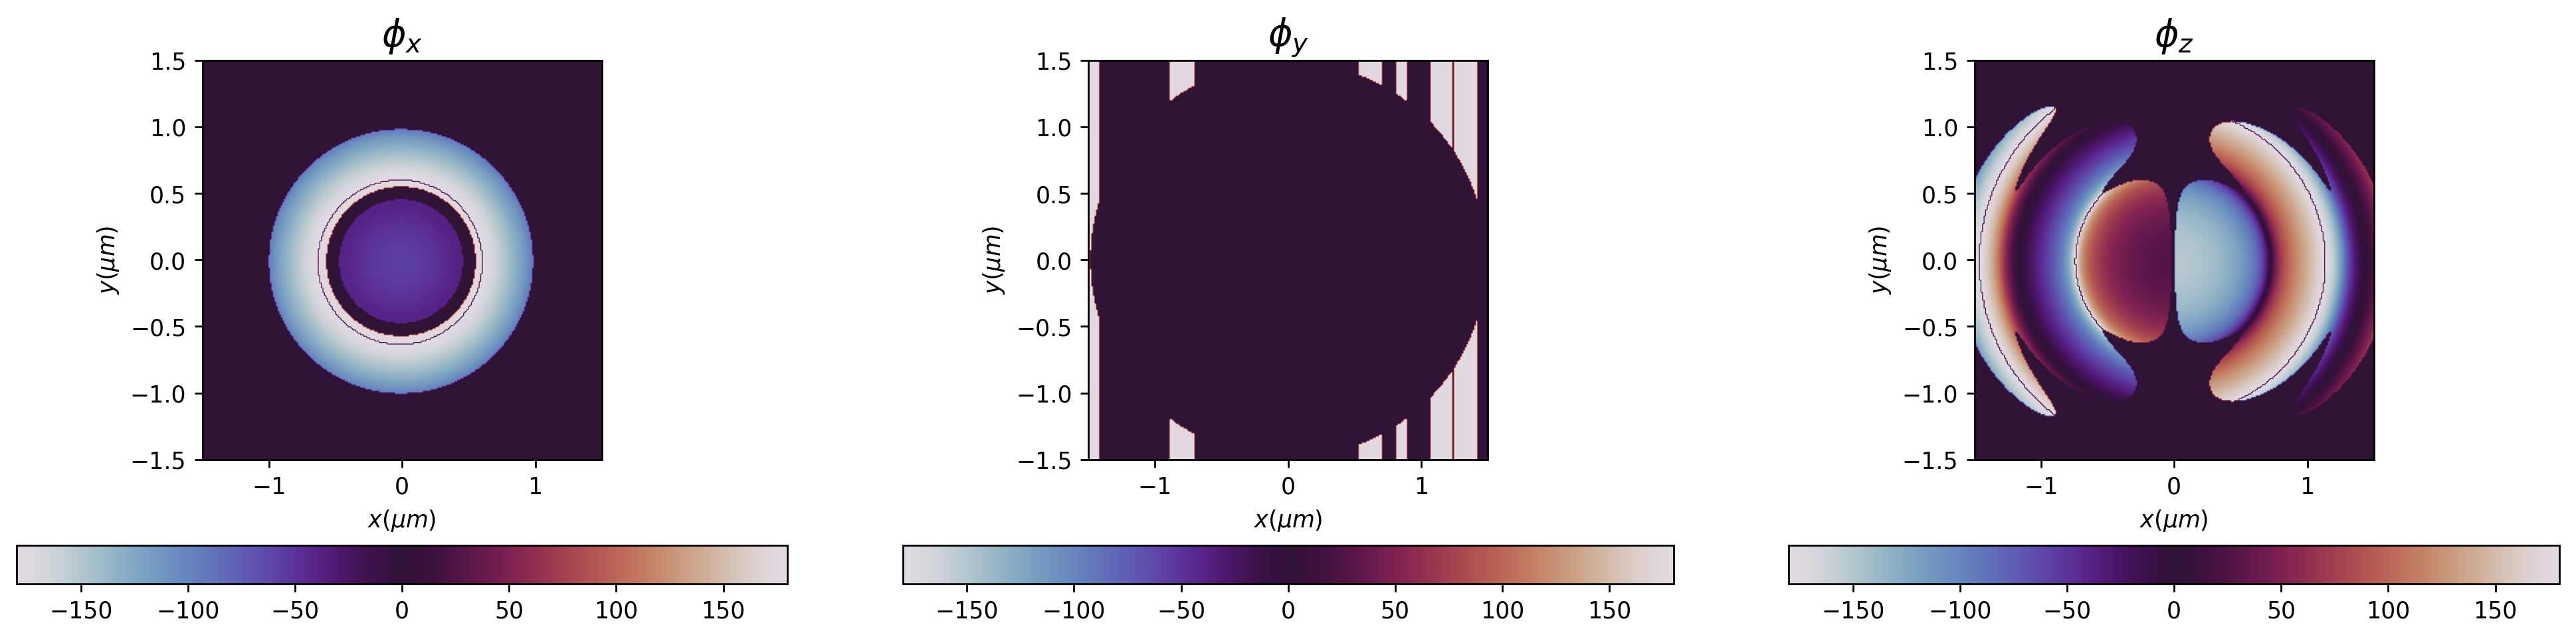

In [44]:
EM2.draw('phases');


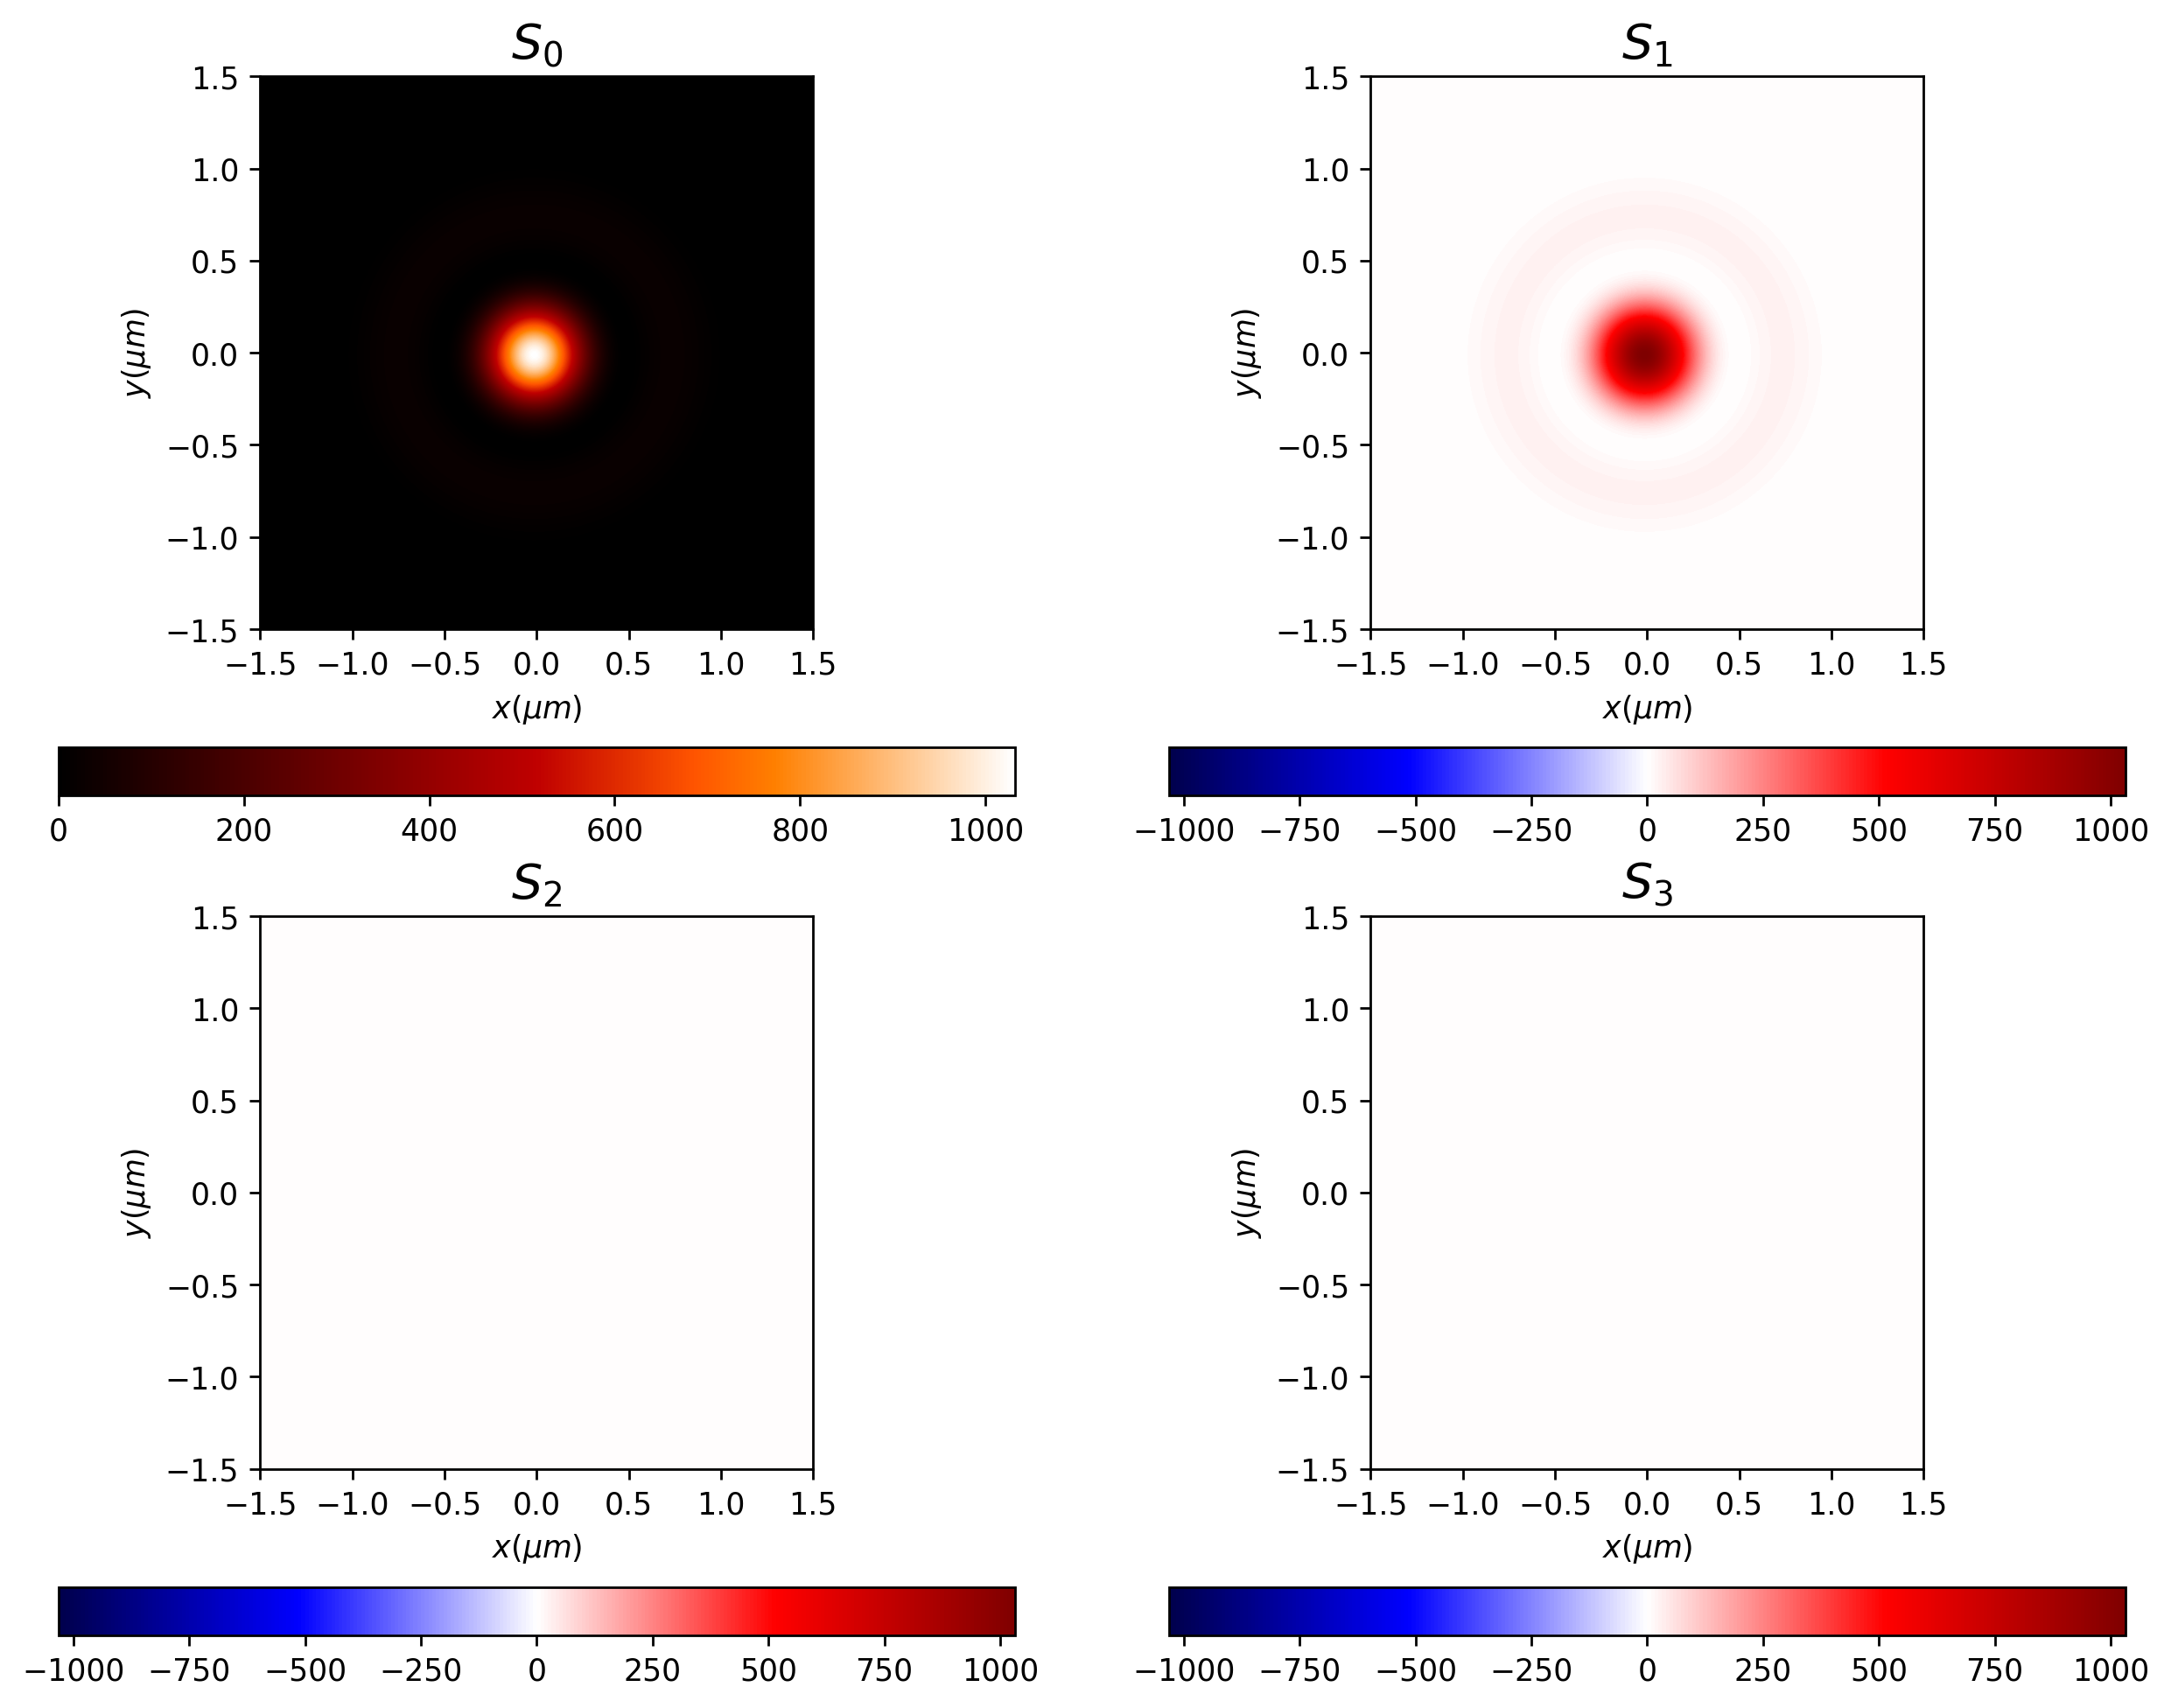

In [45]:
EM2.draw('stokes', logarithm=0);


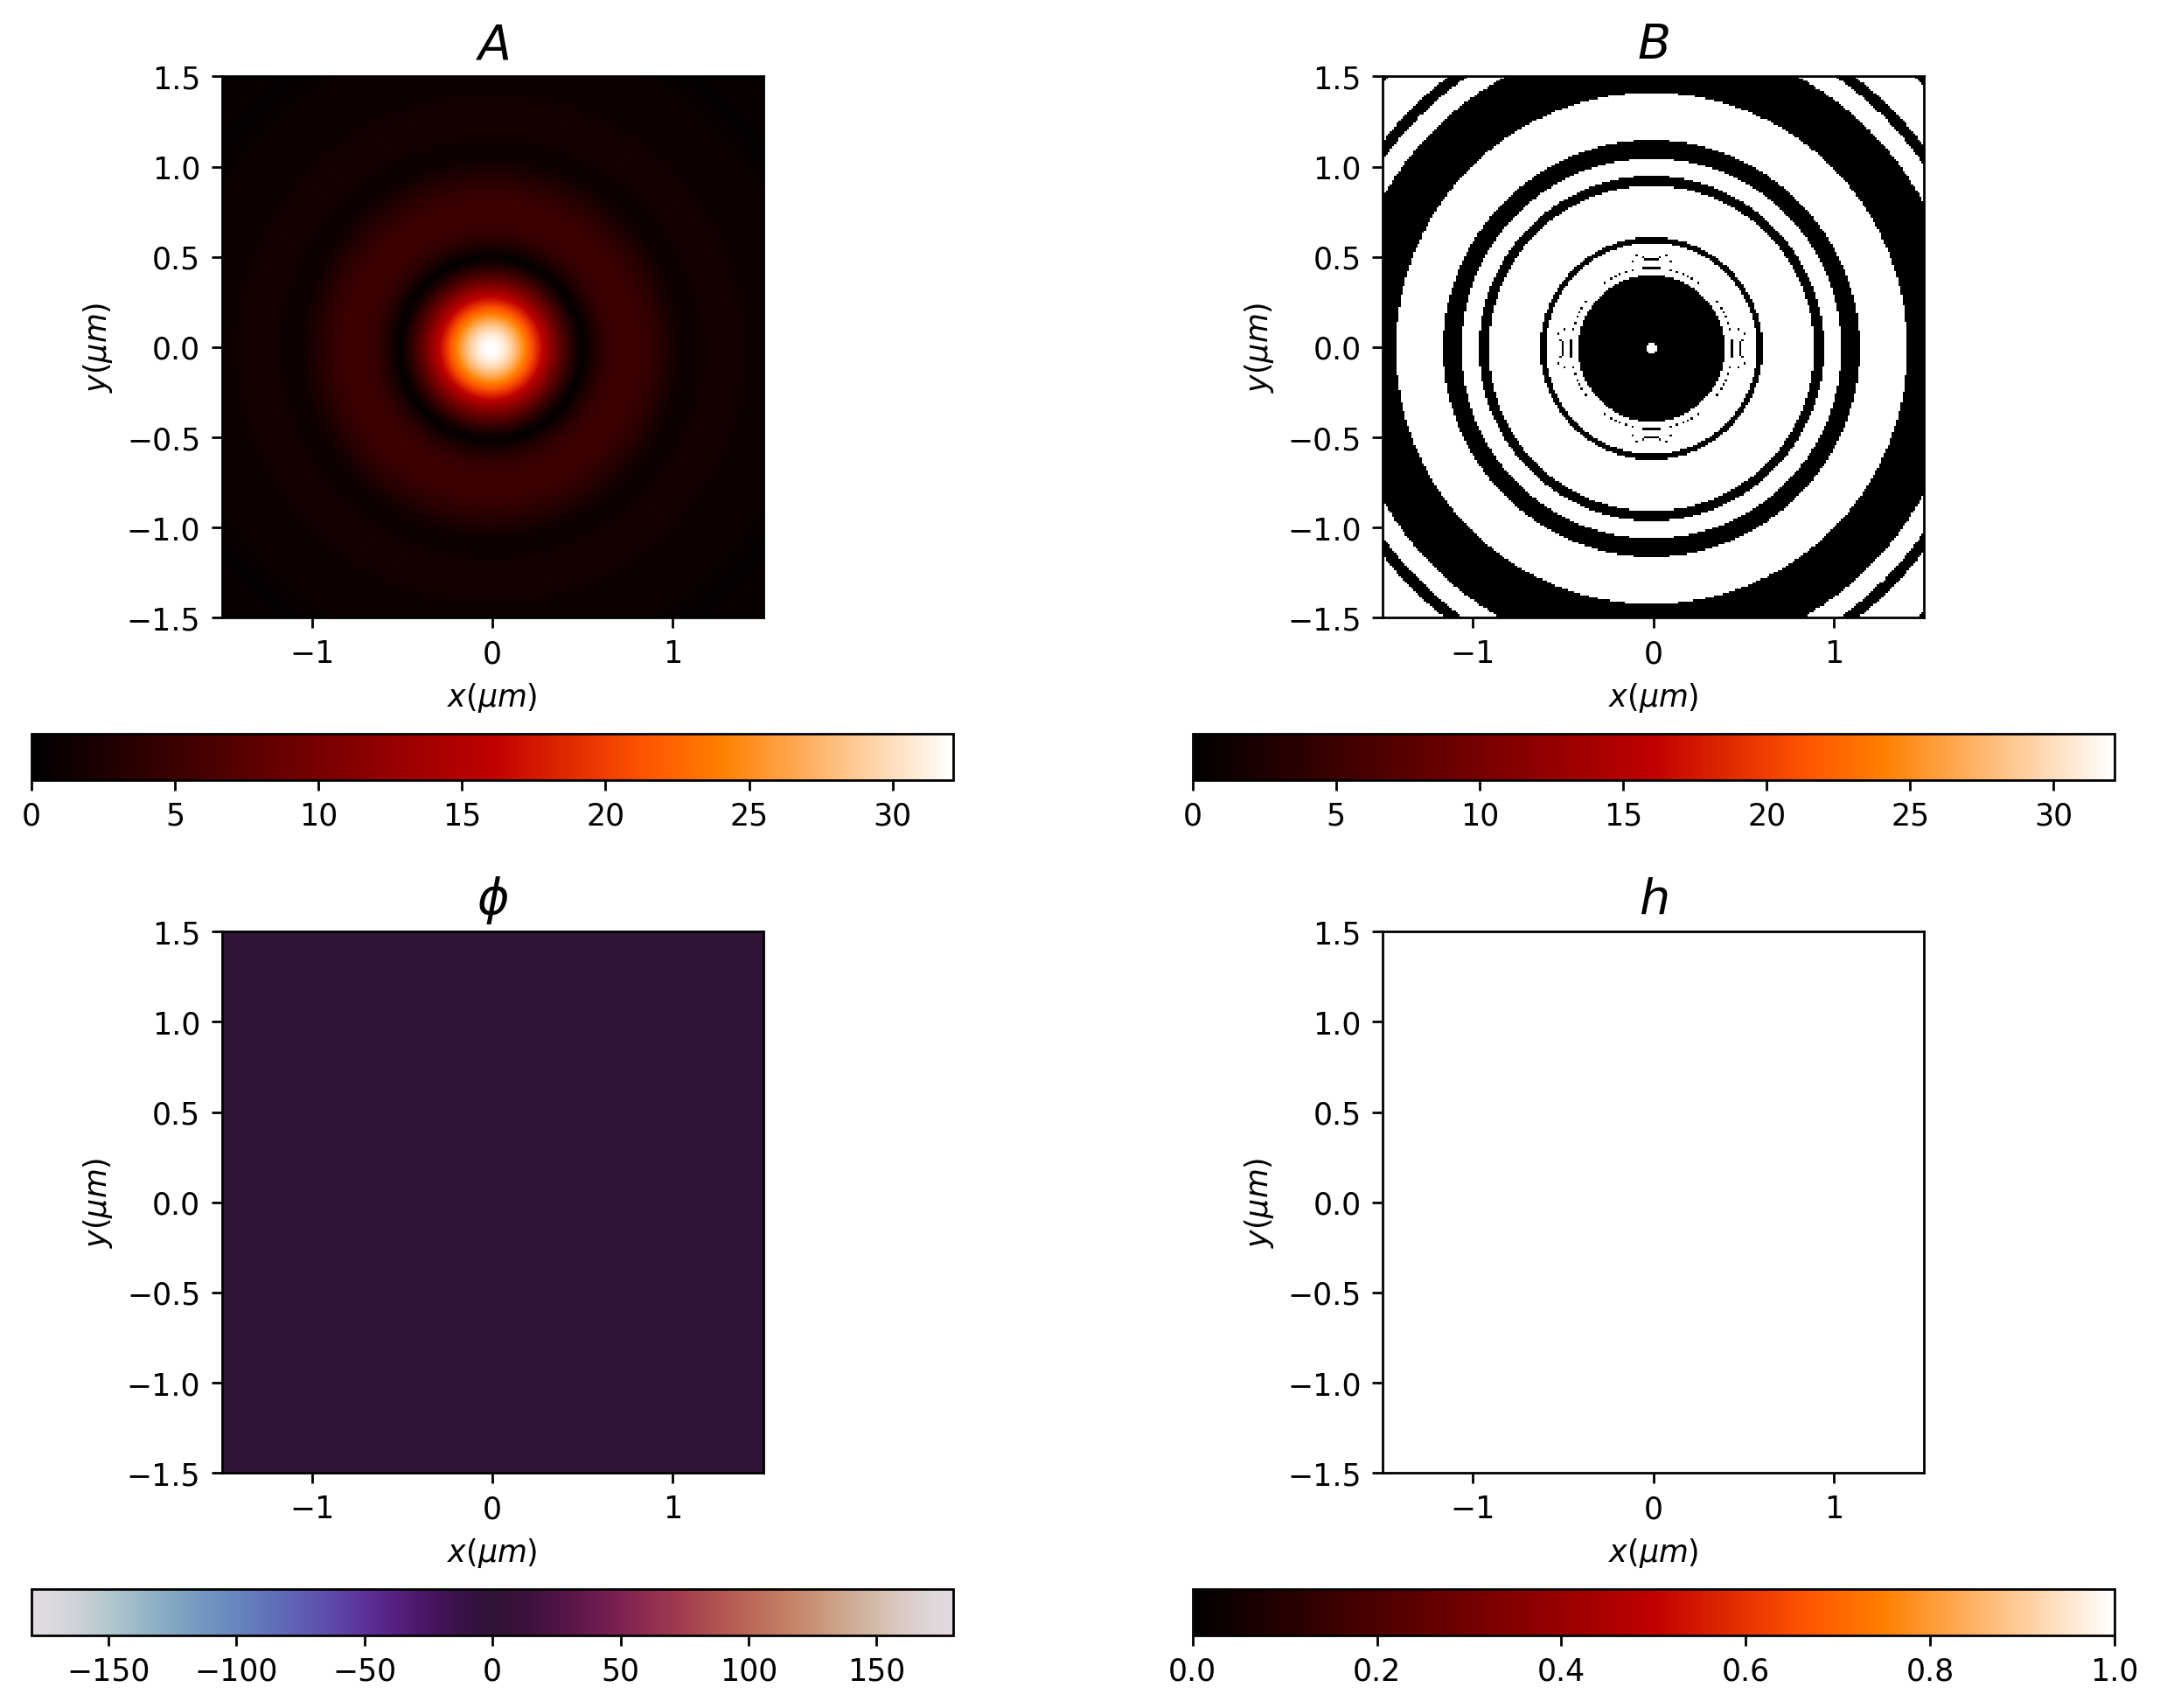

In [46]:
EM2.draw('param_ellipse');


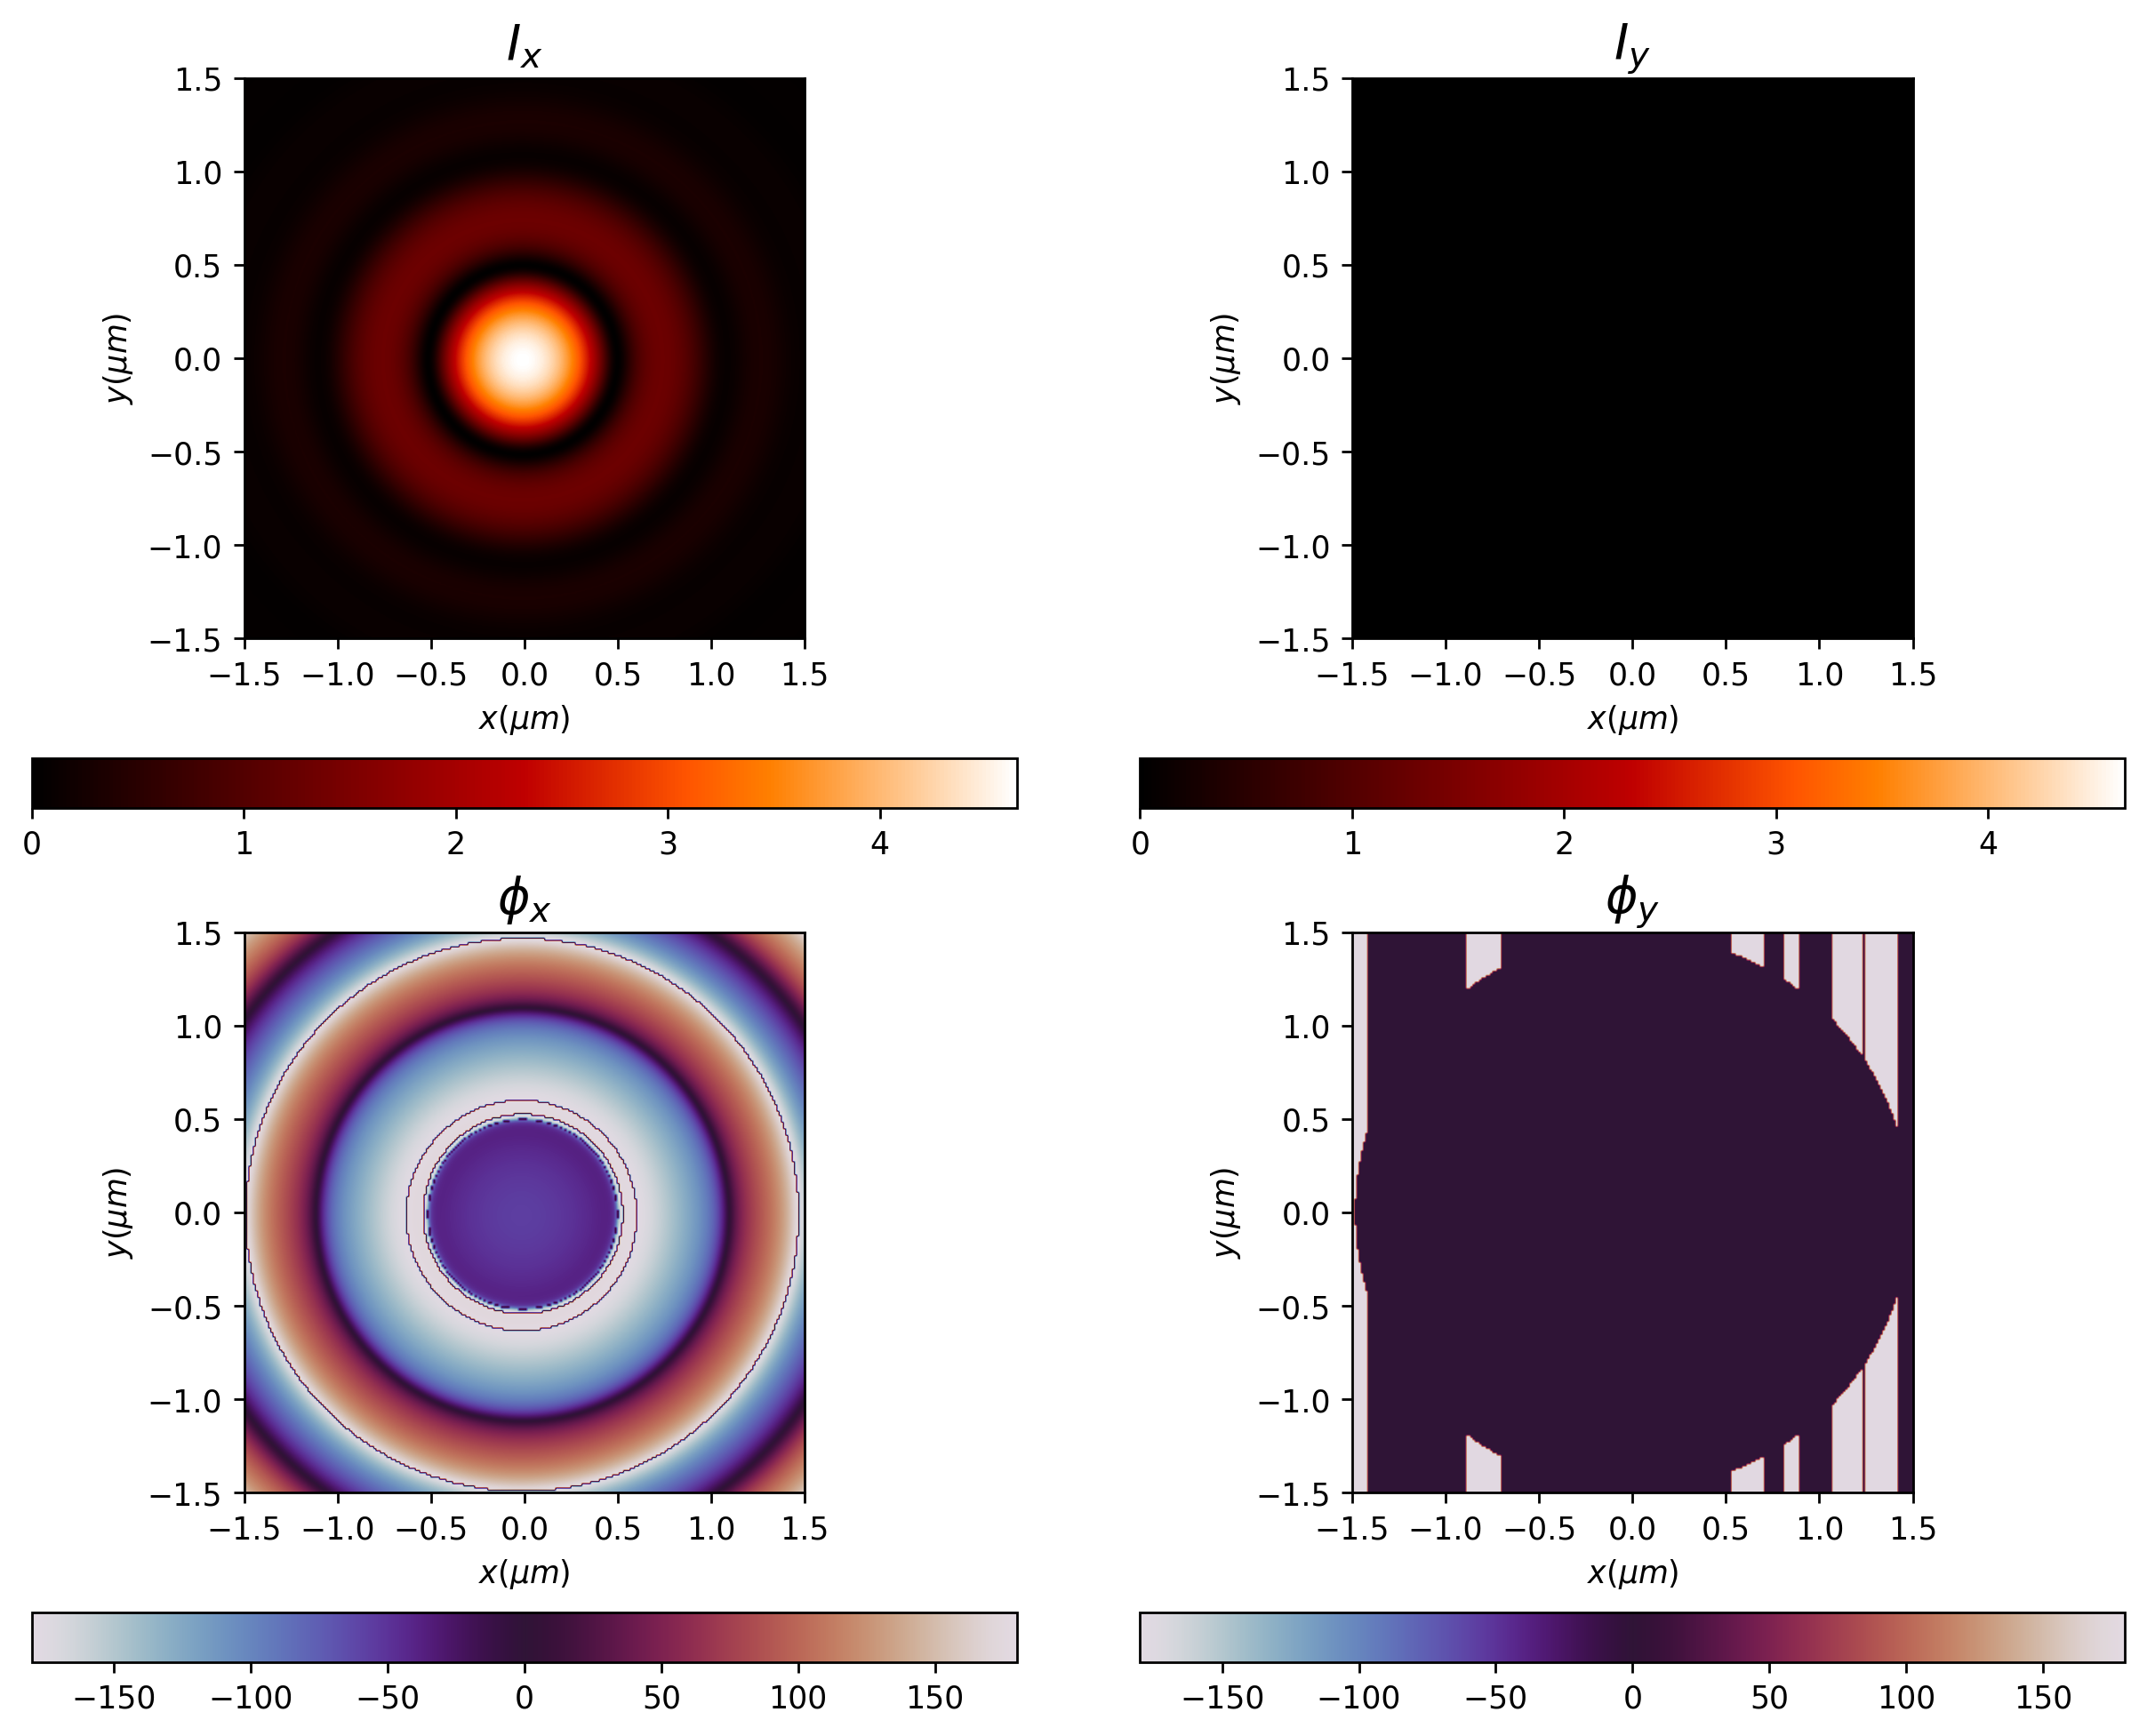

In [47]:
EM2.draw('fields', logarithm=1e-1);


## to XYZ_field


In [48]:
size_out = 2 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 64)
y_out = np.linspace(-size_out / 2, size_out / 2, 64)
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 16)


In [49]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 1.77 s, sys: 3.12 ms, total: 1.77 s
Wall time: 1.77 s
